# **Crime Pattern Analysis and Anomaly Detection in Law Enforcement using Machine Learning**

In [1]:
import pandas as pd
import numpy as np

## **1. Import Dallas Police Dataset**

In [2]:
# Import Dataset
# df_DallasPolice = pd.read_csv('Dallas Police Data.csv')
# df_DallasPolice.head()

## **2. Create Subset and Export to CSV**

In [3]:
# # Create a Subset of 10000 Instances for Preprocessing and Modelling
# df_sample = df_DallasPolice.sample(n=10000, random_state=42)
# df_sample = df_sample.reset_index(drop=True)
# print("Sample Size: ", df_sample.shape)

In [4]:
# df_sample.head()

In [5]:
# print(f'Total Attributes: {df_sample.shape[1]}')

In [6]:
# df_sample.to_csv('Sampled Police Dataset.csv', index=False)

## **3. Understanding Data**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
df_sample = pd.read_csv('dataset.csv') if 'dataset.csv' in os.listdir() else pd.read_csv('https://raw.githubusercontent.com/rwadud/cst8502-data/refs/heads/main/Sampled%20Police%20Dataset%20v2.csv')

### **3.1 Understanding Attributes**

In [9]:
pd.set_option('display.max_columns', None)
df_sample.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,158179-2023,2023,158179-2023-01,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,NaN,5200 HARRY HINES BLVD,NaN,3101,541,NORTHWEST,540,D2,NaN,NaN,2023-09-01 00:00:00.0000000,2023,September,Fri,22:54,244,2023-09-02 00:00:00.0000000,2023.0,September,Sat,02:06,245.0,2023-09-02 06:59:00.0000000,2023-09-02 02:07:03.0000000,2023,September,Sat,02:07,245,23-1720904,2023-09-01 22:54:18.0000000,2023-09-01 22:54:15.0000000,2023-09-02 03:41:06.0000000,2023-09-02 01:04:26.0000000,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12113,"GILMORE,ASHTON",12339,8473,NaN,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,NaN,NaN,NaN,NaN,No,NA-99999999-W4,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2024-10-23 10:34:43.0000000,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...
1,158710-2021,2021,158710-2021-01,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",NaN,6969 MCCALLUM BLVD,NaN,4404,623,NORTH CENTRAL,620,D12,NaN,NaN,2021-09-02 00:00:00.0000000,2021,September,Thu,15:00,245,2021-09-02 00:00:00.0000000,2021.0,September,Thu,16:00,245.0,2021-09-02 17:39:00.0000000,2021-09-02 16:32:31.0000000,2021,September,Thu,16:32,245,21-1664707,2021-09-02 16:31:20.0000000,2021-09-02 16:31:20.0000000,2021-09-02 18:49:13.0000000,2021-09-02 16:31:20.0000000,NaN,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",NaN,NaN,10100,NaN,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,NaN,NaN,NaN,NaN,No,NA-99999999-X3,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2021-09-05 15:20:58.0000000,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ..."
2,231527-2023,2023,231527-2023-02,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),NaN,18806 PRESTON RD,NaN,4422,621,NORTH CENTRAL,620,D12,NaN,NaN,2023-12-28 00:00:00.0000000,2023,December,Thu,08:45,362,2023-12-28 00:00:00.0000000,2023.0,December,Thu,18:45,362.0,2023-12-28 18:47:00.0000000,2023-12-28 19:15:14.0000000,2023,December,Thu,19:15,362,23-2445905,2023-12-28 18:47:28.0000000,2023-12-28 18:47:28.0000000,2023-12-28 21:59:10.0000000,2023-12-28 18:53:24.0000000,NaN,Victim,Individual,White,Non-Hispanic o

In [10]:
# Print Dimensions
print("Shape of Dataset: ", df_sample.shape)
print("\n---First 5 Rows---")
df_sample.head()

Shape of Dataset:  (10000, 86)

---First 5 Rows---


,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,158179-2023,2023,158179-2023-01,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,NaN,5200 HARRY HINES BLVD,NaN,3101,541,NORTHWEST,540,D2,NaN,NaN,2023-09-01 00:00:00.0000000,2023,September,Fri,22:54,244,2023-09-02 00:00:00.0000000,2023.0,September,Sat,02:06,245.0,2023-09-02 06:59:00.0000000,2023-09-02 02:07:03.0000000,2023,September,Sat,02:07,245,23-1720904,2023-09-01 22:54:18.0000000,2023-09-01 22:54:15.0000000,2023-09-02 03:41:06.0000000,2023-09-02 01:04:26.0000000,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12113,"GILMORE,ASHTON",12339,8473,NaN,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,NaN,NaN,NaN,NaN,No,NA-99999999-W4,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2024-10-23 10:34:43.0000000,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...
1,158710-2021,2021,158710-2021-01,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",NaN,6969 MCCALLUM BLVD,NaN,4404,623,NORTH CENTRAL,620,D12,NaN,NaN,2021-09-02 00:00:00.0000000,2021,September,Thu,15:00,245,2021-09-02 00:00:00.0000000,2021.0,September,Thu,16:00,245.0,2021-09-02 17:39:00.0000000,2021-09-02 16:32:31.0000000,2021,September,Thu,16:32,245,21-1664707,2021-09-02 16:31:20.0000000,2021-09-02 16:31:20.0000000,2021-09-02 18:49:13.0000000,2021-09-02 16:31:20.0000000,NaN,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",NaN,NaN,10100,NaN,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,NaN,NaN,NaN,NaN,No,NA-99999999-X3,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2021-09-05 15:20:58.0000000,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ..."
2,231527-2023,2023,231527-2023-02,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),NaN,18806 PRESTON RD,NaN,4422,621,NORTH CENTRAL,620,D12,NaN,NaN,2023-12-28 00:00:00.0000000,2023,December,Thu,08:45,362,2023-12-28 00:00:00.0000000,2023.0,December,Thu,18:45,362.0,2023-12-28 18:47:00.0000000,2023-12-28 19:15:14.0000000,2023,December,Thu,19:15,362,23-2445905,2023-12-28 18:47:28.0000000,2023-12-28 18:47:28.0000000,2023-12-28 21:59:10.0000000,2023-12-28 18:53:24.0000000,NaN,Victim,Individual,White,Non-Hispanic o

In [11]:
# Print Data Types of all attributes
pd.set_option('display.max_rows', None)
print("\n---Data Type of For all Attributes---")
df_sample.dtypes


---Data Type of For all Attributes---


Incident Number w/year                        object
Year of Incident                               int64
Service Number ID                             object
Watch                                          int64
Call (911) Problem                            object
Type of Incident                              object
Type  Location                                object
Type of Property                              object
Incident Address                              object
Apartment Number                              object
Reporting Area                                 int64
Beat                                           int64
Division                                      object
Sector                                         int64
Council District                              object
Target Area Action Grids                      object
Community                                     object
Date1 of Occurrence                           object
Year1 of Occurrence                           

In [12]:
# Count Numerical and Categorical Columns
num_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_sample.select_dtypes(include=['object']).columns

In [13]:
print(f"\nTotal Numerical Columns: {len(num_cols)}")
print(f"Total Categorical Columns: {len(cat_cols)}")


Total Numerical Columns: 20
Total Categorical Columns: 65


### **3.2 Data Quality Issues**

In [14]:
# Identify Missing Values
pd.set_option('display.max_rows', None)
missing_values = df_sample.isnull().sum().sort_values(ascending=False)
print("\n----Missing Values per Attribute----")
missing_values


----Missing Values per Attribute----


UCR Offense Name                             10000
UCR Offense Description                      10000
 UCR Code                                    10000
Reviewing Officer Badge No                   10000
Offense Type                                 10000
Hate Crime                                    9997
Special Report (Pre-RMS)                      9964
Hate Crime Description                        9962
Community                                     8905
Weapon Used                                   8625
Gang Related Offense                          8583
Type of Property                              7751
Responding Officer #2 Badge No                7098
Responding Officer #2  Name                   7098
Apartment Number                              7043
Target Area Action Grids                      6466
Investigating Unit 2                          1391
Investigating Unit 1                          1390
Assisting Officer Badge No                    1027
State                          

In [15]:
# Identify Duplicate Data
pd.set_option('display.max_rows', None)
exclude_id = ['Incident Number w/year', 'Service Number ID']
# Check Duplicates based on excluded columns
df_remove_id = df_sample.drop(columns=exclude_id)
duplicate_count = df_remove_id.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 10


In [16]:
# Data Understanding Summary
print("\n-----Summary of Data Understanding")
print(f"Total Rows: {df_sample.shape[0]}")
print(f"Total Columns: {df_sample.shape[1]}")
print(f"Numerical Columns: {len(num_cols)}")
print(f"Catorigal Columns: {len(cat_cols)}")
print(f"Duplicate Rows: {duplicate_count}")
print(f"Columns with Missing Values: {(df_sample.isnull().sum() > 0).sum()}")


-----Summary of Data Understanding
Total Rows: 10000
Total Columns: 86
Numerical Columns: 20
Catorigal Columns: 65
Duplicate Rows: 10
Columns with Missing Values: 35


### **3.3 Identifying Relationships using Associate Rule Mining and Correlation Matrix**

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
# Select only categorical attributes
cat_cols = df_sample.select_dtypes(include=['object']).columns
df_cat = df_sample[cat_cols].fillna('Unknown')

In [19]:
# One-hot encode the categorical data
df_encoded = pd.get_dummies(df_cat, prefix=cat_cols)

In [20]:
# Apply Apriori Algorithm
df_frequent = apriori(df_encoded, min_support=0.8, use_colnames=True)

# Generate Association Rules
ar = association_rules(df_frequent, metric='confidence', min_threshold=0.7)

# Sort Rules by Lift and and Confidence
rules = ar.sort_values(by=['lift', 'confidence'], ascending=False)

print("\n--- Association Rules (Top 10) ---")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


--- Association Rules (Top 10) ---


,antecedents,consequents,support,confidence,lift
38153,"(State_TX, Drug Related Istevencident_No, Hate...","(Special Report (Pre-RMS)_Unknown, Offense Sta...",0.8188,0.992726,1.141720
38120,"(Special Report (Pre-RMS)_Unknown, Offense Sta...","(State_TX, Drug Related Istevencident_No, Hate...",0.8188,0.941691,1.141720
38733,"(Victim Type_Individual, UCR Disposition_Suspe...","(Special Report (Pre-RMS)_Unknown, Offense Sta...",0.8187,0.992725,1.141719
38812,"(Special Report (Pre-RMS)_Unknown, Offense Sta...","(Victim Type_Individual, UCR Disposition_Suspe...",0.8187,0.941576,1.141719
38880,"(State_TX, Drug Related Istevencident_No, Hate...","(Special Report (Pre-RMS)_Unknown, Victim Type...",0.8187,0.992604,1.141712
38665,"(Special Report (Pre-RMS)_Unknown, Victim Type...","(State_TX, Drug Related Istevencident_No, Hate...",0.8187,0.941684,1.141712
34880,"(State_TX, Drug Related Istevencident_No, Hate...","(Offense Status_Suspended, City_DALLAS, Hate C...",0.8218,0.996363,1.141701
34917,"(Offense Status_Suspended, City_DALLAS, Hate C...","(State_TX, Drug Related Istevencident_No, Hate...",0.8218,0.941675,1.141701
38316,"(Victim Type_Individual, UCR Disposition_Suspe...","(Offense Status_Suspended, City_DALLAS, Hate C...",0.8217,0.996362,1.141701
38465,"(Offense Status_Suspended, City_DALLAS, Hate C...","(Victim Type_Individual, UCR Disposition_Suspe...",0.8217,0.941561,1.141701


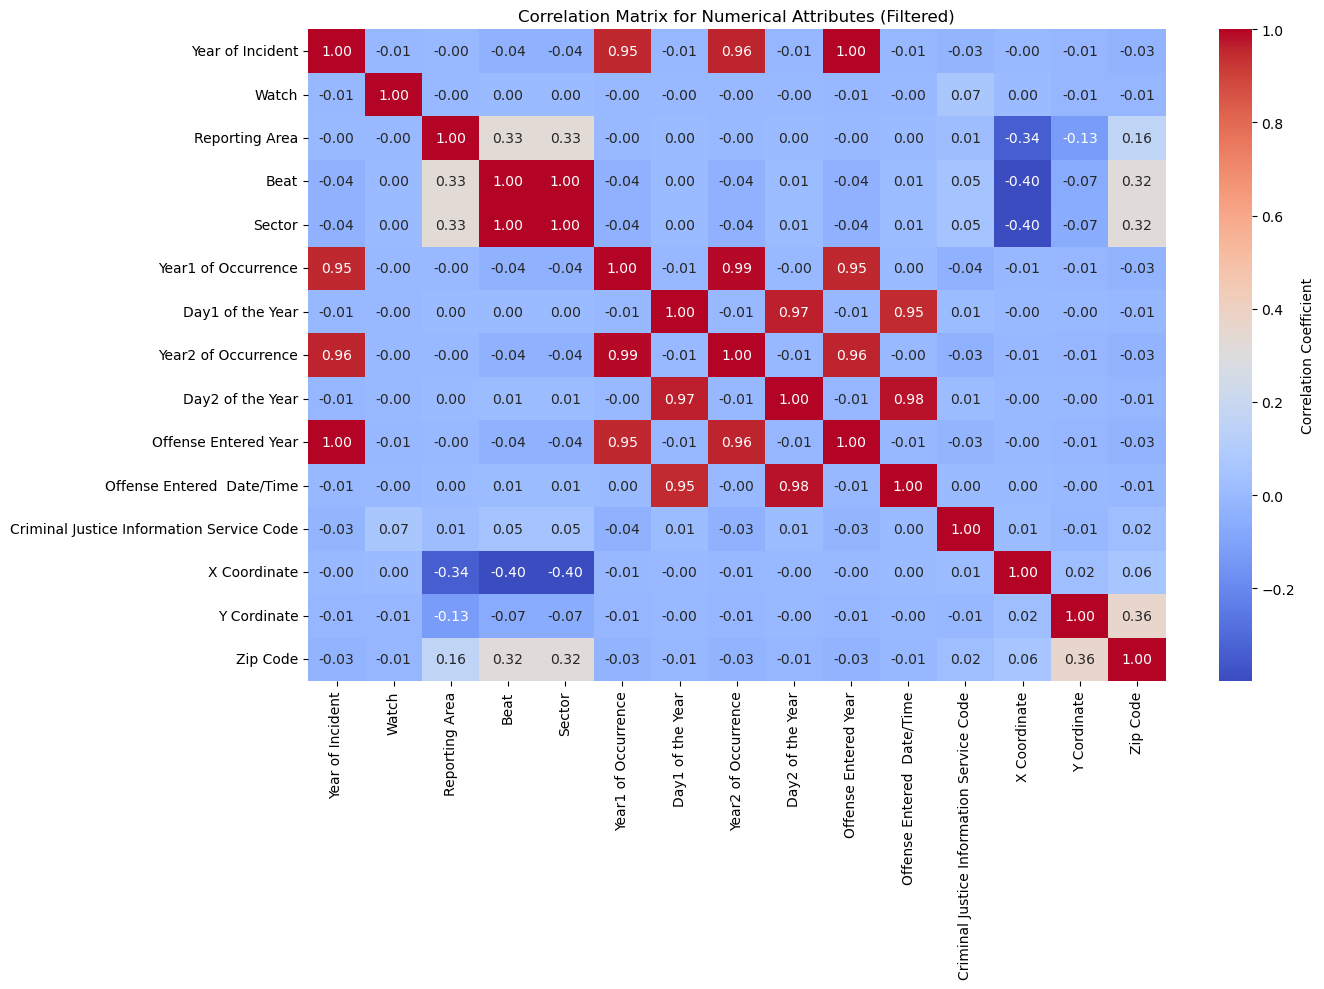


--- Strong Correlations (|r| > 0.5) ---
                                           Year of Incident  Watch  \
Year of Incident                                   1.000000    NaN   
Watch                                                   NaN    1.0   
Reporting Area                                          NaN    NaN   
Beat                                                    NaN    NaN   
Sector                                                  NaN    NaN   
Year1 of Occurrence                                0.951430    NaN   
Day1 of the Year                                        NaN    NaN   
Year2 of Occurrence                                0.958940    NaN   
Day2 of the Year                                        NaN    NaN   
Offense Entered Year                               0.999949    NaN   
Offense Entered  Date/Time                              NaN    NaN   
Criminal Justice Information Service Code               NaN    NaN   
X Coordinate                                     

In [21]:
# Filter out the attributes with missing correlation values
# Remove: UCR Offense Name, UCR Offense Description, UCR Code, Offense Type
attributes_to_exclude = ['UCR Offense Name', 'UCR Offense Description', ' UCR Code', 'Offense Type', 'Reviewing Officer Badge No']

# Select only numerical attributes and exclude the specified ones
num_cols_filtered = df_sample.select_dtypes(include=['int64', 'float64']).columns
num_cols_filtered = [col for col in num_cols_filtered if col not in attributes_to_exclude]
df_num_filtered = df_sample[num_cols_filtered]

# Compute updated correlation matrix
corr_matrix_filtered = df_num_filtered.corr()

# Display correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix for Numerical Attributes (Filtered)")
plt.tight_layout()
plt.show()

# Display strong correlations (|r| > 0.5)
strong_corr_filtered = corr_matrix_filtered[(corr_matrix_filtered > 0.5) | (corr_matrix_filtered < -0.5)]
print("\n--- Strong Correlations (|r| > 0.5) ---")
print(strong_corr_filtered.dropna(how='all', axis=0).dropna(how='all', axis=1))

#### **3.3.1 Relationships Found by Ibrahim Irfan**

**Incident Distribution by Watch/Shift**

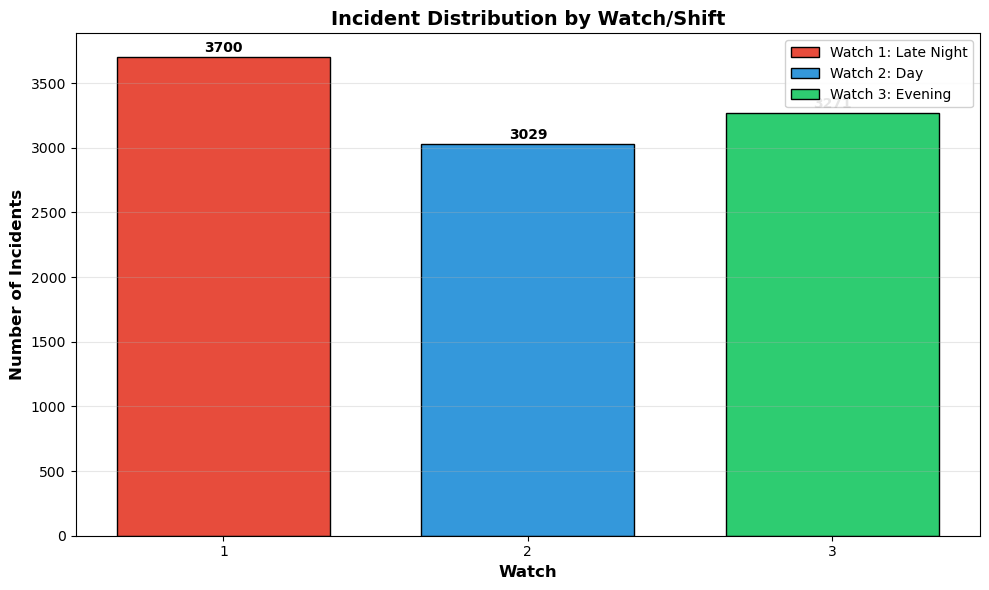


Watch Distribution:
  Watch 1 (Late Night): 3,700 (37.0%)
  Watch 2 (Day): 3,029 (30.3%)
  Watch 3 (Evening): 3,271 (32.7%)


In [22]:
# Chart 1: Watch Distribution
plt.figure(figsize=(10, 6))
watch_counts = df_sample['Watch'].astype(str).value_counts().sort_index()
colors_watch = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']

# Define watch labels for legend
watch_labels = {
    '1': 'Watch 1: Late Night',
    '2': 'Watch 2: Day',
    '3': 'Watch 3: Evening',
    'U': 'Watch U: Unknown'
}

# Create bars with labels for legend
bars = []
for i, (watch_id, count) in enumerate(watch_counts.items()):
    label = watch_labels.get(str(watch_id), f'Watch {watch_id}')
    bar = plt.bar(i, count, color=colors_watch[i % len(colors_watch)],
                  edgecolor='black', width=0.7, label=label)
    bars.append(bar)

plt.xlabel('Watch', fontsize=12, fontweight='bold')
plt.ylabel('Number of Incidents', fontsize=12, fontweight='bold')
plt.title('Incident Distribution by Watch/Shift', fontsize=14, fontweight='bold')
plt.xticks(range(len(watch_counts)), watch_counts.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(watch_counts.values):
    plt.text(i, v + max(watch_counts.values)*0.01, str(v), ha='center', fontweight='bold', fontsize=10)

# Add legend to top right
plt.legend(loc='upper right', framealpha=0.9, fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nWatch Distribution:")
for idx, val in watch_counts.items():
    watch_name = watch_labels.get(str(idx), f'Watch {idx}').split(': ')[1]
    print(f"  Watch {idx} ({watch_name}): {val:,} ({val/len(df_sample)*100:.1f}%)")

#### **3.3.2 Relaships Found by Redwan Wadud**

**Victim Geneder Distribution**

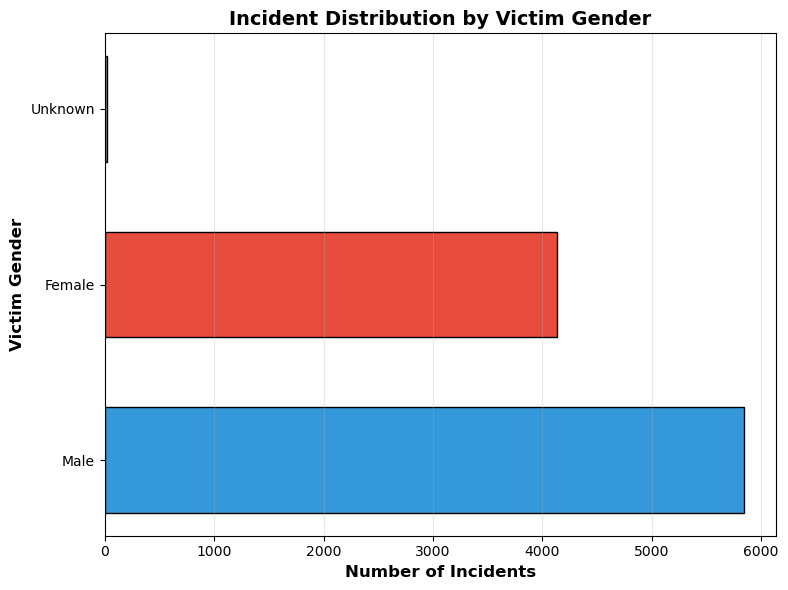

In [23]:
# Victim Gender Distribution Chart
plt.figure(figsize=(8, 6))
gender_counts = df_sample['Victim Gender'].value_counts()
colors_gender = ['#3498db', '#e74c3c', '#95a5a6']
plt.barh(range(len(gender_counts)), gender_counts.values,
         color=colors_gender[:len(gender_counts)], edgecolor='black', height=0.6)
plt.ylabel('Victim Gender', fontsize=12, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=12, fontweight='bold')
plt.title('Incident Distribution by Victim Gender', fontsize=14, fontweight='bold')
plt.yticks(range(len(gender_counts)), gender_counts.index)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()


#### **3.3.3 Relationships Found by Abu Ambia**

**NIBRS Crime Classification**

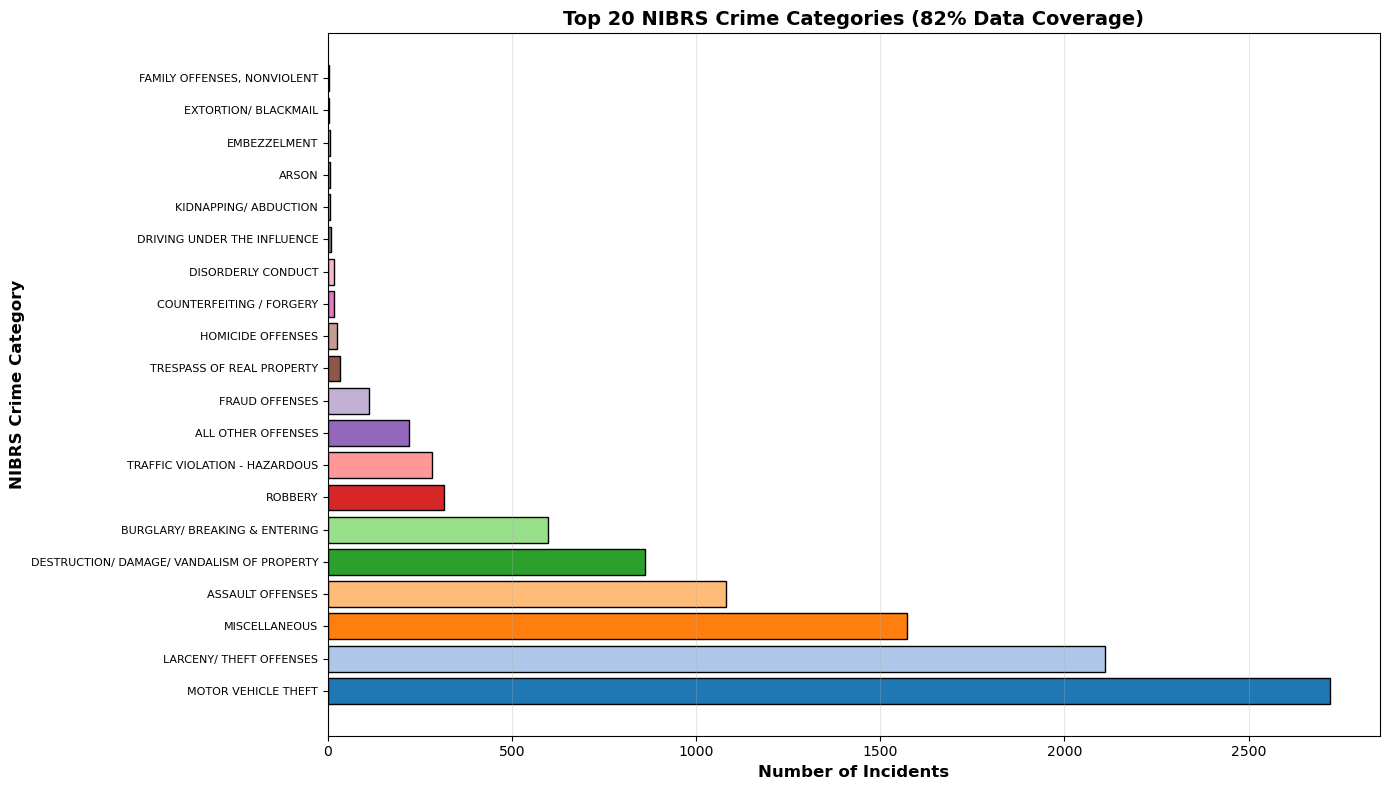

In [24]:
# Chart 3: NIBRS Crime Category
plt.figure(figsize=(14, 8))
nibrs_category_counts = df_sample['NIBRS Crime Category'].value_counts().head(20)
colors_nibrs = plt.cm.tab20(range(len(nibrs_category_counts)))
plt.barh(range(len(nibrs_category_counts)), nibrs_category_counts.values,
         color=colors_nibrs, edgecolor='black')
plt.ylabel('NIBRS Crime Category', fontsize=12, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=12, fontweight='bold')
plt.title('Top 20 NIBRS Crime Categories (82% Data Coverage)', fontsize=14, fontweight='bold')
plt.yticks(range(len(nibrs_category_counts)), nibrs_category_counts.index, fontsize=8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## **4. General Data Preparation**

###  **4.1 Rename Attributes**

In [25]:
df_sample.rename(columns={'Drug Related Istevencident': 'Drug Related Incident', 'Offense Entered  Date/Time': 'Day Offense Entered', 
                          'Y Cordinate':'Y Coordinate'}, inplace=True)
print("\nDataFrame with multiple columns renamed:")
df_sample.dtypes


DataFrame with multiple columns renamed:


Incident Number w/year                        object
Year of Incident                               int64
Service Number ID                             object
Watch                                          int64
Call (911) Problem                            object
Type of Incident                              object
Type  Location                                object
Type of Property                              object
Incident Address                              object
Apartment Number                              object
Reporting Area                                 int64
Beat                                           int64
Division                                      object
Sector                                         int64
Council District                              object
Target Area Action Grids                      object
Community                                     object
Date1 of Occurrence                           object
Year1 of Occurrence                           

### **4.2 Drop ID Attributes**

In [26]:
ID_cols_drop = ['Incident Number w/year', 'Service Number ID']
df_drop_ID = df_sample.drop(columns=ID_cols_drop)

In [27]:
df_drop_ID.head()

,Year of Incident,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Day Offense Entered,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Drug Related Incident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Coordinate,Zip Code,City,State,Location1
0,2023,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,NaN,5200 HARRY HINES BLVD,NaN,3101,541,NORTHWEST,540,D2,NaN,NaN,2023-09-01 00:00:00.0000000,2023,September,Fri,22:54,244,2023-09-02 00:00:00.0000000,2023.0,September,Sat,02:06,245.0,2023-09-02 06:59:00.0000000,2023-09-02 02:07:03.0000000,2023,September,Sat,02:07,245,23-1720904,2023-09-01 22:54:18.0000000,2023-09-01 22:54:15.0000000,2023-09-02 03:41:06.0000000,2023-09-02 01:04:26.0000000,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12113,"GILMORE,ASHTON",12339,8473,NaN,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,NaN,NaN,NaN,NaN,No,NA-99999999-W4,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2024-10-23 10:34:43.0000000,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...
1,2021,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",NaN,6969 MCCALLUM BLVD,NaN,4404,623,NORTH CENTRAL,620,D12,NaN,NaN,2021-09-02 00:00:00.0000000,2021,September,Thu,15:00,245,2021-09-02 00:00:00.0000000,2021.0,September,Thu,16:00,245.0,2021-09-02 17:39:00.0000000,2021-09-02 16:32:31.0000000,2021,September,Thu,16:32,245,21-1664707,2021-09-02 16:31:20.0000000,2021-09-02 16:31:20.0000000,2021-09-02 18:49:13.0000000,2021-09-02 16:31:20.0000000,NaN,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",NaN,NaN,10100,NaN,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,NaN,NaN,NaN,NaN,No,NA-99999999-X3,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2021-09-05 15:20:58.0000000,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ..."
2,2023,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),NaN,18806 PRESTON RD,NaN,4422,621,NORTH CENTRAL,620,D12,NaN,NaN,2023-12-28 00:00:00.0000000,2023,December,Thu,08:45,362,2023-12-28 00:00:00.0000000,2023.0,December,Thu,18:45,362.0,2023-12-28 18:47:00.0000000,2023-12-28 19:15:14.0000000,2023,December,Thu,19:15,362,23-2445905,2023-12-28 18:47:28.0000000,2023-12-28 18:47:28.0000000,2023-12-28 21:59:10.0000000,2023-12-28 18:53:24.0000000,NaN,Victim,Individual,White,Non-Hispanic or Latino,Male,12175,"AVILA,BRYAN,J",11836,"RENARD,DOUGARTHVILI",12175,7046,NaN,F655,Investigations,Property Crime Division / NC Prop

### **4.3 Remove Duplicates**

In [28]:
df_drop_ID.drop_duplicates(inplace=True)

In [29]:
df_drop_ID.shape

(9990, 84)

### **4.4 Add ID as Index Column**

In [30]:
df_drop_ID['ID'] = range(1, len(df_drop_ID) + 1)
df_setIndex = df_drop_ID.set_index('ID')
df_setIndex.head()

,Year of Incident,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Day Offense Entered,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Drug Related Incident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Coordinate,Zip Code,City,State,Location1
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2023,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,NaN,5200 HARRY HINES BLVD,NaN,3101,541,NORTHWEST,540,D2,NaN,NaN,2023-09-01 00:00:00.0000000,2023,September,Fri,22:54,244,2023-09-02 00:00:00.0000000,2023.0,September,Sat,02:06,245.0,2023-09-02 06:59:00.0000000,2023-09-02 02:07:03.0000000,2023,September,Sat,02:07,245,23-1720904,2023-09-01 22:54:18.0000000,2023-09-01 22:54:15.0000000,2023-09-02 03:41:06.0000000,2023-09-02 01:04:26.0000000,NaN,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12113,"GILMORE,ASHTON",12339,8473,NaN,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,NaN,NaN,NaN,NaN,No,NA-99999999-W4,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2024-10-23 10:34:43.0000000,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...
2,2021,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",NaN,6969 MCCALLUM BLVD,NaN,4404,623,NORTH CENTRAL,620,D12,NaN,NaN,2021-09-02 00:00:00.0000000,2021,September,Thu,15:00,245,2021-09-02 00:00:00.0000000,2021.0,September,Thu,16:00,245.0,2021-09-02 17:39:00.0000000,2021-09-02 16:32:31.0000000,2021,September,Thu,16:32,245,21-1664707,2021-09-02 16:31:20.0000000,2021-09-02 16:31:20.0000000,2021-09-02 18:49:13.0000000,2021-09-02 16:31:20.0000000,NaN,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",NaN,NaN,10100,NaN,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,NaN,NaN,NaN,NaN,No,NA-99999999-X3,99999999.0,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2021-09-05 15:20:58.0000000,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ..."
3,2023,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),NaN,18806 PRESTON RD,NaN,4422,621,NORTH CENTRAL,620,D12,NaN,NaN,2023-12-28 00:00:00.0000000,2023,December,Thu,08:45,362,2023-12-28 00:00:00.0000000,2023.0,December,Thu,18:45,362.0,2023-12-28 18:47:00.0000000,2023-12-28 19:15:14.0000000,2023,December,Thu,19:15,362,23-2445905,2023-12-28 18:47:28.0000000,2023-12-28 18:47:28.0000000,2023-12-28 21:59:10.0000000,2023-12-28 18:53:24.0000000,NaN,Victim,Individual,White,Non-Hispanic or Latino,Male,12175,"AVILA,BRYAN,J",11836,"RE

In [31]:
df_setIndex.shape

(9990, 84)

### **4.5 Drop All Attributes with Missing Values(>60%)**

In [32]:
# Too many missing values to be used for modelling
missingVals_Cols_drop = attributes_over_5000_missing = [
    "UCR Offense Name",
    "UCR Offense Description",
    " UCR Code",
    "Reviewing Officer Badge No",
    "Offense Type",
    "Hate Crime",
    "Special Report (Pre-RMS)",
    "Hate Crime Description",
    "Community",
    "Weapon Used",
    "Gang Related Offense",
    "Type of Property",
    "Responding Officer #2 Badge No",
    "Responding Officer #2  Name",
    "Apartment Number",
    "Target Area Action Grids"
]
df_drop_missing = df_setIndex.drop(columns=missingVals_Cols_drop)

In [33]:
df_drop_missing.shape[1]

68

In [34]:
df_drop_missing.head()

,Year of Incident,Watch,Call (911) Problem,Type of Incident,Type Location,Incident Address,Reporting Area,Beat,Division,Sector,Council District,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Day Offense Entered,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Reporting Officer Badge No,Assisting Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Drug Related Incident,RMS Code,Criminal Justice Information Service Code,Penal Code,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Coordinate,Zip Code,City,State,Location1
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2023,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,5200 HARRY HINES BLVD,3101,541,NORTHWEST,540,D2,2023-09-01 00:00:00.0000000,2023,September,Fri,22:54,244,2023-09-02 00:00:00.0000000,2023.0,September,Sat,02:06,245.0,2023-09-02 06:59:00.0000000,2023-09-02 02:07:03.0000000,2023,September,Sat,02:07,245,23-1720904,2023-09-01 22:54:18.0000000,2023-09-01 22:54:15.0000000,2023-09-02 03:41:06.0000000,2023-09-02 01:04:26.0000000,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12339,8473,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,No,NA-99999999-W4,99999999.0,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2024-10-23 10:34:43.0000000,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...
2,2021,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",6969 MCCALLUM BLVD,4404,623,NORTH CENTRAL,620,D12,2021-09-02 00:00:00.0000000,2021,September,Thu,15:00,245,2021-09-02 00:00:00.0000000,2021.0,September,Thu,16:00,245.0,2021-09-02 17:39:00.0000000,2021-09-02 16:32:31.0000000,2021,September,Thu,16:32,245,21-1664707,2021-09-02 16:31:20.0000000,2021-09-02 16:31:20.0000000,2021-09-02 18:49:13.0000000,2021-09-02 16:31:20.0000000,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",10100,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,No,NA-99999999-X3,99999999.0,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2021-09-05 15:20:58.0000000,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ..."
3,2023,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),18806 PRESTON RD,4422,621,NORTH CENTRAL,620,D12,2023-12-28 00:00:00.0000000,2023,December,Thu,08:45,362,2023-12-28 00:00:00.0000000,2023.0,December,Thu,18:45,362.0,2023-12-28 18:47:00.0000000,2023-12-28 19:15:14.0000000,2023,December,Thu,19:15,362,23-2445905,2023-12-28 18:47:28.0000000,2023-12-28 18:47:28.0000000,2023-12-28 21:59:10.0000000,2023-12-28 18:53:24.0000000,Victim,Individual,White,Non-Hispanic or Latino,Male,12175,"AVILA,BRYAN,J",12175,7046,F655,Investigations,Property Crime Division / NC Property Crimes,Suspended,Suspended,SUSP CAUSED DAMAGE TO COMPS PROPERTY,False,No,MA-29990043-L100,29990043.0,PC 28.03(b)(3)(A),DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,290,A,Coded,2024-01-08 22:41:15.0000000,2.491101e+06,7.053365e+06,75252.0,DALLAS,TX,"18806 PRESTON RD DALLAS TX 75252 (33.00657, -9..."
4,2021,1,20R - ROBBERY (REPORT)+1HR,THEFT OF PROP > OR EQUAL $100 <$750 (NOT S

### **4.6 Convert Attributes to Categorical**

In [35]:
# 'Watch' attribute had mixed data types so we converted it string first
df_drop_missing['Watch'] = df_drop_missing['Watch'].astype(str)

In [36]:
# Create a list that converts attributes to categorical
cat_attributes = [
    "Watch",
    "Call (911) Problem",
    "Type of Incident",
    "Type  Location",
    "Reporting Area",
    "Beat",
    "Division",
    "Sector",
    "Council District",
    "Person Involvement Type",
    "Victim Type",
    "Offense Status",
    "Modus Operandi (MO)",
    "Penal Code",
    "NIBRS Crime",
    "Family Offense",
    "Drug Related Istevencident"
]

# Convert these columns to categorical dtype if they exist
converted_columns = []
for col in cat_attributes:
    if col in df_drop_missing.columns:
        df_drop_missing[col] = df_drop_missing[col].astype("category")
        converted_columns.append(col)
    else:
        print(f"Warning: Column '{col}' not found in dataset")

In [37]:
df_drop_missing['Watch'].unique()

['1', '2', '3']
Categories (3, object): ['1', '2', '3']

### **4.7 Convert Attributes to Date-Time and Generate Meaningful Attributes**

#### **4.7.1 Create Date Of Incident Attribute**

In [38]:
import datetime

# Merge Date1, Year1, and Time1 of Occurrence into a single datetime column: `OccurrenceDateTime`
# Strategy: Use Date1 if available, otherwise construct from Year1 + Time1

def _combine_occurrence(row):
    """
    Combine Date1 of Occurrence (date) with Time1 of Occurrence (time) into a datetime.
    If Date1 is missing, use Year1 as fallback.
    """
    date_val = row.get('Date1 of Occurrence')
    time_val = row.get('Time1 of Occurrence')
    year_val = row.get('Year1 of Occurrence')
    
    # Try to use Date1 first (it's a date object already)
    if pd.notna(date_val):
        try:
            date_part = pd.to_datetime(str(date_val).strip(), errors='coerce').date()
            if date_part is not None and pd.notna(date_part):
                if pd.notna(time_val) and str(time_val).strip() and str(time_val).strip().lower() != 'none':
                    dt_str = f"{date_part} {str(time_val).strip()}"
                else:
                    dt_str = f"{date_part} 00:00:00"
                return pd.to_datetime(dt_str, errors='coerce')
        except Exception:
            pass
    
    # Fallback: Use Year1 + Jan 1 + Time1
    if pd.notna(year_val):
        try:
            year_int = int(str(year_val).strip())
            if pd.notna(time_val) and str(time_val).strip() and str(time_val).strip().lower() != 'none':
                dt_str = f"{year_int:04d}-01-01 {str(time_val).strip()}"
            else:
                dt_str = f"{year_int:04d}-01-01 00:00:00"
            return pd.to_datetime(dt_str, errors='coerce')
        except Exception:
            pass
    
    return pd.NaT

if 'Date1 of Occurrence' in df_drop_missing.columns and 'Time1 of Occurrence' in df_drop_missing.columns:
    df_drop_missing['Date of Incident'] = df_drop_missing.apply(_combine_occurrence, axis=1)
    print('✓ Created `Date of Incident` by merging Date1 + Time1 of Occurrence')
    print(f'  Dtype: {df_drop_missing["Date of Incident"].dtype}')
    print(f'  Non-null count: {df_drop_missing["Date of Incident"].notna().sum()} / {len(df_drop_missing)}')
else:
    print('✗ Missing required columns. Available occurrence columns:')
    for col in df_drop_missing.columns:
        if 'Occurrence' in col:
            print(f'  - {col}')



✓ Created `Date of Incident` by merging Date1 + Time1 of Occurrence
  Dtype: datetime64[ns]
  Non-null count: 9990 / 9990


In [39]:
df_drop_missing['Date of Incident'].dtype

dtype('<M8[ns]')

In [40]:
# First 5 rows of the new Date of Incident attribute
df_drop_missing['Date of Incident'].head()

ID
1   2023-09-01 22:54:00
2   2021-09-02 15:00:00
3   2023-12-28 08:45:00
4   2021-04-14 00:00:00
5   2020-10-09 21:13:00
Name: Date of Incident, dtype: datetime64[ns]

#### **4.7.2 Find the Difference b/w Call Date Time and Call Cleared Date Time**

In [41]:
# Calculate the difference between Call Date Time and Call Cleared Date Time
# First, check if these columns exist in the dataset
print("Checking for Call Date/Time columns...")
print("\nAvailable datetime-related columns in df_drop_missing:")
datetime_cols = [col for col in df_drop_missing.columns if 'call' in col.lower() or 'time' in col.lower() or 'date' in col.lower()]
for col in datetime_cols:
    print(f"  - {col}")


Checking for Call Date/Time columns...

Available datetime-related columns in df_drop_missing:
  - Call (911) Problem
  - Date1 of Occurrence
  - Time1 of Occurrence
  - Date2 of Occurrence 
  - Time2 of Occurrence
  - Date of Report
  - Date incident created
  - Offense Entered Time
  - Call Received Date Time
  - Call Date Time
  - Call Cleared Date Time
  - Call Dispatch Date Time
  - Update Date
  - Date of Incident


In [42]:
# Convert to datetime if needed
df_drop_missing['Call Date Time'] = pd.to_datetime(df_drop_missing['Call Date Time'], errors='coerce')
df_drop_missing['Call Cleared Date Time'] = pd.to_datetime(df_drop_missing['Call Cleared Date Time'], errors='coerce')

# Calculate Response Time directly in hours (without intermediate column)
df_drop_missing['Response Time (Hours)'] = (df_drop_missing['Call Cleared Date Time'] - df_drop_missing['Call Date Time']).dt.total_seconds() / 3600
print(f"✓ Calculated 'Response Time (Hours)'")

# Create new dataset
df_Response_Time = df_drop_missing.copy()
print(f"✓ Created new dataset 'df_Response_Time' with shape: {df_Response_Time.shape}")

print("\nFirst 10 rows with Response Time:")
df_Response_Time[['Call Date Time', 'Call Cleared Date Time', 'Response Time (Hours)']].head(10)


✓ Calculated 'Response Time (Hours)'
✓ Created new dataset 'df_Response_Time' with shape: (9990, 70)

First 10 rows with Response Time:


,Call Date Time,Call Cleared Date Time,Response Time (Hours)
ID,,,
1,2023-09-01 22:54:15,2023-09-02 03:41:06,4.780833
2,2021-09-02 16:31:20,2021-09-02 18:49:13,2.298056
3,2023-12-28 18:47:28,2023-12-28 21:59:10,3.195000
4,2021-04-14 15:43:49,2021-04-14 17:26:40,1.714167
5,2020-10-09 21:18:47,2020-10-10 01:15:52,3.951389
6,2024-08-26 14:11:53,2024-08-27 08:28:31,18.277222
7,2022-03-21 10:22:33,2022-03-21 11:26:54,1.072500
8,2024-02-24 20:15:16,2024-02-25 09:34:45,13.324722
9,2022-04-17 12:46:03,2022-04-17 14:43:41,1.960556


In [43]:
# Summary statistics for Response Time
print("=" * 60)
print("RESPONSE TIME SUMMARY STATISTICS")
print("=" * 60)
print(f"\nDataset: {len(df_Response_Time)} rows")
print(f"\nResponse Time (Hours) Statistics:")
print(df_Response_Time['Response Time (Hours)'].describe())

print(f"  Minimum: {df_Response_Time['Response Time (Hours)'].min():.2f} hours")
print(f"  Maximum: {df_Response_Time['Response Time (Hours)'].max():.2f} hours")
print(f"  Mean: {df_Response_Time['Response Time (Hours)'].mean():.2f} hours")
print(f"  Median: {df_Response_Time['Response Time (Hours)'].median():.2f} hours")
print(f"  Std Dev: {df_Response_Time['Response Time (Hours)'].std():.2f} hours")


RESPONSE TIME SUMMARY STATISTICS

Dataset: 9990 rows

Response Time (Hours) Statistics:
count    9990.000000
mean        4.811824
std         8.534616
min         0.000000
25%         1.601736
50%         2.782083
75%         5.031528
max       292.565000
Name: Response Time (Hours), dtype: float64
  Minimum: 0.00 hours
  Maximum: 292.56 hours
  Mean: 4.81 hours
  Median: 2.78 hours
  Std Dev: 8.53 hours


#### **4.7.3 Find the Time Taken to Report an Incident**

In [44]:
# Extract Time Taken to Report (difference between Date of Report and Date of Incident in hours)
if 'Date of Incident' in df_Response_Time.columns and 'Date of Report' in df_Response_Time.columns:
    df_Response_Time['Date of Incident'] = pd.to_datetime(df_Response_Time['Date of Incident'], errors='coerce')
    df_Response_Time['Date of Report'] = pd.to_datetime(df_Response_Time['Date of Report'], errors='coerce')
    # Calculate difference between report date and incident date
    df_Response_Time['Time Taken to Report (Hours)'] = ((df_Response_Time['Date of Report'] - df_Response_Time['Date of Incident']).dt.total_seconds() / 3600).abs()
    print(f"\n✓ Extracted 'Time Taken to Report (Hours)' from Date of Incident and Date of Report")
    print(f"  Note: Time Taken to Report = Date of Report - Date of Incident")
    # Drop date columns after feature engineering
    df_Report_Time = df_Response_Time.drop(columns=['Date of Incident', 'Date of Report', 'Date incident created'])
    print(f"✓ Dropped 'Date of Incident' and 'Date of Report'")
else:
    print("\n✗ Warning: Date of Incident or Date of Report column not found")



✓ Extracted 'Time Taken to Report (Hours)' from Date of Incident and Date of Report
  Note: Time Taken to Report = Date of Report - Date of Incident
✓ Dropped 'Date of Incident' and 'Date of Report'


### **4.8 Clustering X and Y Coordinates by Zones**

In [45]:
# Cluster X and Y Coordinates into Geographic Zones using KMeans
from sklearn.cluster import KMeans

# Extract coordinate data
coords = df_Response_Time[['X Coordinate', 'Y Coordinate']]

# Handle missing coordinate values
coords_filled = coords.fillna(coords.mean())

# Set the number of clusters
optimal_k = 7
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
zone_labels = kmeans_final.fit_predict(coords_filled)

# Create Zone attribute
df_Response_Time['Zone'] = zone_labels

# Mark rows with missing coordinates as Zone = -1
df_Response_Time.loc[coords.isna().any(axis=1), 'Zone'] = -1
df_Response_Time['Zone'] = df_Response_Time['Zone'].astype(int)

print("✓ Zone feature successfully created by clustering X and Y coordinates")
print(f"  Unique Zones: {df_Response_Time['Zone'].unique()}")
print(f"  Zone value counts:\n{df_Response_Time['Zone'].value_counts().sort_index()}")


✓ Zone feature successfully created by clustering X and Y coordinates
  Unique Zones: [2 0 3 4 1 5 6]
  Zone value counts:
Zone
0     961
1    1033
2    2848
3    1180
4    1247
5    1549
6    1172
Name: count, dtype: int64


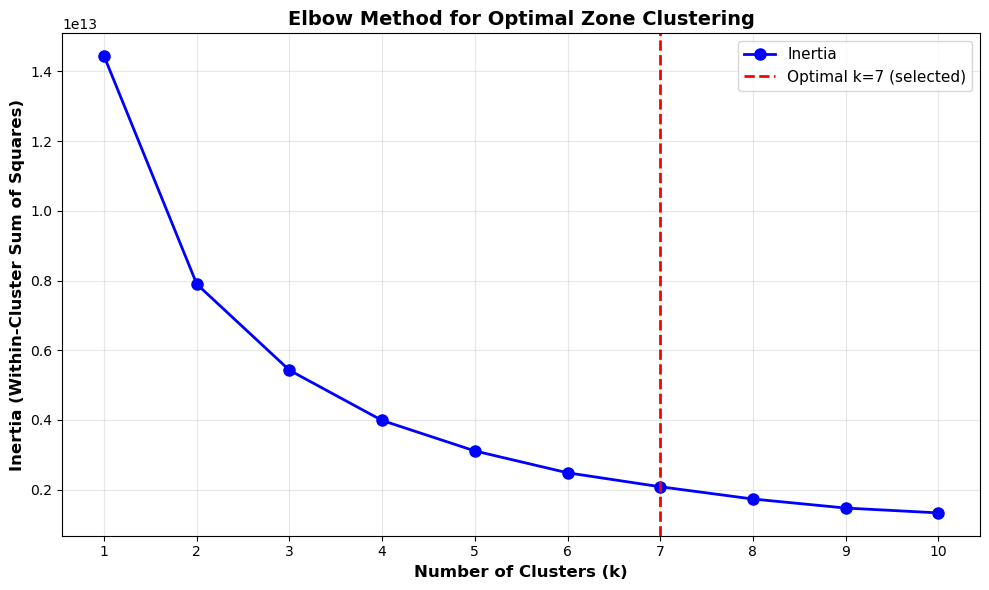


ELBOW METHOD ANALYSIS: INERTIA VALUES BY K
k =  1 | Inertia = 14435555042450.46
k =  2 | Inertia = 7895469188560.97
k =  3 | Inertia = 5424981687107.42
k =  4 | Inertia = 3984138345495.68
k =  5 | Inertia = 3110530967136.97
k =  6 | Inertia = 2483644524199.37
k =  7 | Inertia = 2083277308252.51 ← SELECTED
k =  8 | Inertia = 1731218359811.67
k =  9 | Inertia = 1472757835300.92
k = 10 | Inertia = 1333443129157.52


In [46]:
# Elbow Method to visualize inertia reduction across different k values
# This helps validate that k=7 is a good choice for zone clustering

inertias = []
k_range = range(1, 11)

# Calculate inertia for k=1 to k=10
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(coords_filled)
    inertias.append(kmeans_temp.inertia_)

# Create elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8, label='Inertia')
plt.axvline(x=7, color='red', linestyle='--', linewidth=2, label='Optimal k=7 (selected)')
plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
plt.title('Elbow Method for Optimal Zone Clustering', fontsize=14, fontweight='bold')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print inertia values for reference
print("\n" + "="*60)
print("ELBOW METHOD ANALYSIS: INERTIA VALUES BY K")
print("="*60)
for k, inertia in zip(k_range, inertias):
    if k == 7:
        print(f"k = {k:2d} | Inertia = {inertia:10.2f} ← SELECTED")
    else:
        print(f"k = {k:2d} | Inertia = {inertia:10.2f}")
print("="*60)


In [47]:
df_Report_Time.head()

,Year of Incident,Watch,Call (911) Problem,Type of Incident,Type Location,Incident Address,Reporting Area,Beat,Division,Sector,Council District,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Day Offense Entered,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Reporting Officer Badge No,Assisting Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Drug Related Incident,RMS Code,Criminal Justice Information Service Code,Penal Code,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Coordinate,Zip Code,City,State,Location1,Response Time (Hours),Time Taken to Report (Hours)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2023,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,5200 HARRY HINES BLVD,3101,541,NORTHWEST,540,D2,2023-09-01 00:00:00.0000000,2023,September,Fri,22:54,244,2023-09-02 00:00:00.0000000,2023.0,September,Sat,02:06,245.0,2023,September,Sat,02:07,245,23-1720904,2023-09-01 22:54:18.0000000,2023-09-01 22:54:15,2023-09-02 03:41:06,2023-09-02 01:04:26.0000000,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12339,8473,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,No,NA-99999999-W4,99999999.0,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2024-10-23 10:34:43.0000000,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...,4.780833,8.083333
2,2021,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",6969 MCCALLUM BLVD,4404,623,NORTH CENTRAL,620,D12,2021-09-02 00:00:00.0000000,2021,September,Thu,15:00,245,2021-09-02 00:00:00.0000000,2021.0,September,Thu,16:00,245.0,2021,September,Thu,16:32,245,21-1664707,2021-09-02 16:31:20.0000000,2021-09-02 16:31:20,2021-09-02 18:49:13,2021-09-02 16:31:20.0000000,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",10100,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,No,NA-99999999-X3,99999999.0,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2021-09-05 15:20:58.0000000,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ...",2.298056,2.650000
3,2023,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),18806 PRESTON RD,4422,621,NORTH CENTRAL,620,D12,2023-12-28 00:00:00.0000000,2023,December,Thu,08:45,362,2023-12-28 00:00:00.0000000,2023.0,December,Thu,18:45,362.0,2023,December,Thu,19:15,362,23-2445905,2023-12-28 18:47:28.0000000,2023-12-28 18:47:28,2023-12-28 21:59:10,2023-12-28 18:53:24.0000000,Victim,Individual,White,Non-Hispanic or Latino,Male,12175,"AVILA,BRYAN,J",12175,7046,F655,Investigations,Property Crime Division / NC Property Crimes,Suspended,Suspended,SUSP CAUSED DAMAGE TO COMPS PROPERTY,False,No,MA-29990043-L100,29990043.0,PC 28.03(b)(3)(A),DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,290,A,Coded,2024-01-08 22:41:15.0000000,2.491101e+06,7.053365e+06,75252.0,DALLAS,TX,"18806 PRESTON RD DALLAS TX 75252 (33.00657, -9...",3.195000,10.033333
4,2021,1,20R - ROBBERY (REPORT)+1HR,THEFT OF PROP > OR EQUAL $100 <$750 (NOT SHOPL...,Parking (Business),3200 W ILLINOIS AVE,4208,445,SOUTHWEST,440,D3,2021-04-14 00:00:00.0000000,2021,April,Wed,00:00,104,2021-04-14 00:00:00.0

In [48]:
# Drop all Unnecesary Date Columns
df_drop_dates = df_Response_Time.drop(columns=['Year1 of Occurrence', 'Month1 of Occurence', 'Date1 of Occurrence', 
'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence ', 'Time2 of Occurrence', 'Day2 of the Week', 'Day2 of the Year',
'Year2 of Occurrence', 'Month2 of Occurence', 'Year of Incident', 'Offense Entered Year', 'Offense Entered Month', 'Offense Entered Time', 'Offense Entered Day of the Week', 'Day Offense Entered',
'Call Date Time', 'Call Cleared Date Time', 'Call Received Date Time', 'Call Dispatch Date Time', 'Update Date', 'Date of Report', 'Date incident created',
'Date of Incident'])


In [49]:
df_drop_dates.head()

,Watch,Call (911) Problem,Type of Incident,Type Location,Incident Address,Reporting Area,Beat,Division,Sector,Council District,Day1 of the Week,CFS Number,Person Involvement Type,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,Responding Officer #1 Badge No,Responding Officer #1 Name,Reporting Officer Badge No,Assisting Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Modus Operandi (MO),Family Offense,Drug Related Incident,RMS Code,Criminal Justice Information Service Code,Penal Code,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,X Coordinate,Y Coordinate,Zip Code,City,State,Location1,Response Time (Hours),Time Taken to Report (Hours),Zone
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,5200 HARRY HINES BLVD,3101,541,NORTHWEST,540,D2,Fri,23-1720904,Victim,Individual,Hispanic or Latino,Hispanic or Latino,Male,12339,"THOMAS,JALEN",12339,8473,A554,Investigations,Capers / Assaults,Suspended,Suspended,COMP WAS SHOT IN THE FINGER.,False,No,NA-99999999-W4,99999999.0,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2.479449e+06,6.982315e+06,75235.0,DALLAS,TX,5200 HARRY HINES BLVD DALLAS TX 75235 (32.8122...,4.780833,8.083333,2
2,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",6969 MCCALLUM BLVD,4404,623,NORTH CENTRAL,620,D12,Thu,21-1664707,Victim,Individual,White,Non-Hispanic or Latino,Female,10100,"CORTINA,FERNANDO",10100,NaN,C631,NaN,NaN,Suspended,Suspended,FOUND PROPERTY.,False,No,NA-99999999-X3,99999999.0,No Offense,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2.494872e+06,7.047093e+06,75252.0,DALLAS,TX,"6969 MCCALLUM BLVD DALLAS TX 75252 (32.98886, ...",2.298056,2.650000,0
3,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),18806 PRESTON RD,4422,621,NORTH CENTRAL,620,D12,Thu,23-2445905,Victim,Individual,White,Non-Hispanic or Latino,Male,12175,"AVILA,BRYAN,J",12175,7046,F655,Investigations,Property Crime Division / NC Property Crimes,Suspended,Suspended,SUSP CAUSED DAMAGE TO COMPS PROPERTY,False,No,MA-29990043-L100,29990043.0,PC 28.03(b)(3)(A),DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,290,A,Coded,2.491101e+06,7.053365e+06,75252.0,DALLAS,TX,"18806 PRESTON RD DALLAS TX 75252 (33.00657, -9...",3.195000,10.033333,0
4,1,20R - ROBBERY (REPORT)+1HR,THEFT OF PROP > OR EQUAL $100 <$750 (NOT SHOPL...,Parking (Business),3200 W ILLINOIS AVE,4208,445,SOUTHWEST,440,D3,Wed,21-0658491,Victim,Individual,Black,Non-Hispanic or Latino,Female,11453,"ESPINOSA,RENE",11453,122493,C415,Investigations,Property Crime Division / SW Property Crimes,Suspended,Suspended,UNK SUSP TOOK COMP'S PROP W/O CONSENT.,False,No,MB-23990191-F183,23990191.0,PC 31.03(e)(2)(A),ALL OTHER LARCENY,LARCENY/ THEFT OFFENSES,PROPERTY,23H,A,Coded,2.468868e+06,6.948852e+06,75211.0,DALLAS,TX,"3200 W ILLINOIS AVE DALLAS TX 75211 (32.71998,...",1.714167,15.716667,3
5,3,19 - SHOOTING,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/V...,Single Family Residence - Occupied,6906 ANTLER AVE,2208,352,SOUTHEAST,350,D8,Fri,20-1838019,Victim,Individual,Black,Non-Hispanic or Latino,Male,10634,"DELGADO,ARTURO",10634,7060,C356,Strategic Deployment,Comp Stat Division / Gang,Suspended,Suspended,UNK SUSP SHOT TOWARDS COMPS RESIDENCE AND STRU...,False,No,F1-13140002-D2,13140002.0,PC 22.02(b)(3),AGG ASSAULT - NFV,ASSAULT OFFENSES,PERSON,13A,A,Coded,2.521303e+06,6.948626e+06,75217.0,DALLAS,TX,"6906 ANTLER AVE DALLAS TX 75217 (32.71752, -96...",3.951389,0.083333,4


### **4.8 Drop Unnecessary Geographic Columns**

In [50]:
# Drop all Unnecessary Geographic Columns 
location_attr_drop = ['Incident Address', 'Zip Code', 'City', 'State', 'Location1', 'Reporting Area']
df_loc_drop = df_drop_dates.drop(columns=location_attr_drop)

In [51]:
missing = df_loc_drop.isnull().sum().sort_values(ascending=False)

In [52]:
missing

Investigating Unit 2                         1390
Investigating Unit 1                         1389
Assisting Officer Badge No                   1026
Responding Officer #1  Name                    42
Responding Officer #1  Badge No                40
Penal Code                                     37
Criminal Justice Information Service Code      37
Reporting Officer Badge No                     28
Offense Status                                 26
UCR Disposition                                25
Modus Operandi (MO)                            17
Element Number Assigned                        12
Person Involvement Type                         1
NIBRS Crime Category                            0
Drug Related Incident                           0
NIBRS Crime Against                             0
NIBRS Code                                      0
NIBRS Group                                     0
NIBRS Type                                      0
X Coordinate                                    0


In [53]:
# Drop all other unnecessary attributes
unnecessary_attr_drop = ['Investigating Unit 2', 'Investigating Unit 1', 'Assisting Officer Badge No', 'Responding Officer #1  Badge No', 'Responding Officer #1  Name', 'CFS Number', 
                         'Reporting Officer Badge No', 'Assisting Officer Badge No', 'Element Number Assigned', 'Investigating Unit 1', 'Investigating Unit 2', 'Offense Status', 
                         'UCR Disposition', 'Modus Operandi (MO)', 'Penal Code', 'NIBRS Crime', 'NIBRS Type', 'NIBRS Code', 'Family Offense', 
                         'Drug Related Incident', 'RMS Code', 'Criminal Justice Information Service Code', 'Person Involvement Type']

df_final_cleaned = df_loc_drop.drop(columns=unnecessary_attr_drop)

In [54]:
df_final_cleaned.shape[1]

21

In [55]:
df_final_cleaned.head()

,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone
ID,,,,,,,,,,,,,,,,,,,,,
1,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,541,NORTHWEST,540,D2,Fri,Individual,Hispanic or Latino,Hispanic or Latino,Male,MISCELLANEOUS,MISCELLANEOUS,C,2.479449e+06,6.982315e+06,4.780833,8.083333,2
2,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",623,NORTH CENTRAL,620,D12,Thu,Individual,White,Non-Hispanic or Latino,Female,MISCELLANEOUS,MISCELLANEOUS,C,2.494872e+06,7.047093e+06,2.298056,2.650000,0
3,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),621,NORTH CENTRAL,620,D12,Thu,Individual,White,Non-Hispanic or Latino,Male,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,A,2.491101e+06,7.053365e+06,3.195000,10.033333,0
4,1,20R - ROBBERY (REPORT)+1HR,THEFT OF PROP > OR EQUAL $100 <$750 (NOT SHOPL...,Parking (Business),445,SOUTHWEST,440,D3,Wed,Individual,Black,Non-Hispanic or Latino,Female,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.468868e+06,6.948852e+06,1.714167,15.716667,3
5,3,19 - SHOOTING,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/V...,Single Family Residence - Occupied,352,SOUTHEAST,350,D8,Fri,Individual,Black,Non-Hispanic or Latino,Male,ASSAULT OFFENSES,PERSON,A,2.521303e+06,6.948626e+06,3.951389,0.083333,4


In [56]:
# Find number of columns for the Prepared Data
df_final_cleaned.shape[1]

21

In [57]:
# Export Data for Modelling
df_final_cleaned.to_csv('Prepared Data.csv')

In [58]:
df_prepared_data = df_final_cleaned.copy()

## **5. Classification by Abu Ambia**

In [59]:
df_dt= df_prepared_data.copy()

In [60]:
# Bin the Watch column
watch_mapping = {
    '1': 'Late Night',

    '2': 'Day',

    '3': 'Evening',

    'U': 'Unknown'
}

df_dt['Watch_bin'] = df_dt['Watch'].map(watch_mapping)

In [61]:
df_dt['Watch_bin'].value_counts()


Watch_bin
Late Night    3699
Evening       3269
Day           3022
Name: count, dtype: int64

In [62]:
# Check unique NIBRS Crime Categories to group into 11 categories
print("Unique NIBRS Crime Categories:")
print(df_dt['NIBRS Crime Category'].value_counts())
print(f"\nTotal unique categories: {df_dt['NIBRS Crime Category'].nunique()}")

Unique NIBRS Crime Categories:
NIBRS Crime Category
MOTOR VEHICLE THEFT                           2721
LARCENY/ THEFT OFFENSES                       2107
MISCELLANEOUS                                 1572
ASSAULT OFFENSES                              1079
DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY     861
BURGLARY/ BREAKING & ENTERING                  597
ROBBERY                                        313
TRAFFIC VIOLATION - HAZARDOUS                  281
ALL OTHER OFFENSES                             219
FRAUD OFFENSES                                 109
TRESPASS OF REAL PROPERTY                       33
HOMICIDE OFFENSES                               26
COUNTERFEITING / FORGERY                        17
DISORDERLY CONDUCT                              16
DRIVING UNDER THE INFLUENCE                      9
KIDNAPPING/ ABDUCTION                            6
ARSON                                            6
EMBEZZELMENT                                     5
EXTORTION/ BLACKMAIL          

In [63]:
# Create target column by grouping NIBRS Crime Categories into 6 groups
# Consolidated grouping based on crime severity and type

nibrs_to_group = {
    # 1. Violent Crimes
    'HOMICIDE OFFENSES': 'Violent Crimes',
    'ASSAULT OFFENSES': 'Violent Crimes',
    'ROBBERY': 'Violent Crimes',
    'KIDNAPPING/ ABDUCTION': 'Violent Crimes',
    'SEXUAL ASSAULT OFFENSES': 'Violent Crimes',

    # 2. Property Crime - Theft
    'LARCENY/ THEFT OFFENSES': 'Property Crime - Theft',
    'MOTOR VEHICLE THEFT': 'Property Crime - Theft',
    'STOLEN PROPERTY OFFENSES': 'Property Crime - Theft',

    # 3. Property Crime - Burglary
    'BURGLARY/ BREAKING & ENTERING': 'Property Crime - Burglary',

    # 4. Fraud & Economic Crimes
    'FRAUD OFFENSES': 'Fraud & Economic Crimes',
    'COUNTERFEITING / FORGERY': 'Fraud & Economic Crimes',
    'EMBEZZELMENT': 'Fraud & Economic Crimes',
    'EXTORTION/ BLACKMAIL': 'Fraud & Economic Crimes',

    # 5. Traffic Violations
    'TRAFFIC VIOLATION - HAZARDOUS': 'Traffic Violations',
    'DRIVING UNDER THE INFLUENCE': 'Traffic Violations',

    # 6. Other Offenses (consolidates all remaining crimes)
    'DRUG/ NARCOTIC VIOLATIONS': 'Other Offenses',
    'DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY': 'Other Offenses',
    'ARSON': 'Other Offenses',
    'TRESPASS OF REAL PROPERTY': 'Other Offenses',
    'DISORDERLY CONDUCT': 'Other Offenses',
    'PUBLIC INTOXICATION': 'Other Offenses',
    'FAMILY OFFENSES, NONVIOLENT': 'Other Offenses',
    'MISCELLANEOUS': 'Other Offenses',
    'ALL OTHER OFFENSES': 'Other Offenses'
}

# Apply the mapping to create target column
df_dt['Target'] = df_dt['NIBRS Crime Category'].map(nibrs_to_group)

# Verify the grouping
print("Target Column Distribution (6 groups):")
target_dist = df_dt['Target'].value_counts().sort_values(ascending=False)
print(target_dist)
print(f"\nTotal groups: {df_dt['Target'].nunique()}")


Target Column Distribution (6 groups):
Target
Property Crime - Theft       4830
Other Offenses               2714
Violent Crimes               1424
Property Crime - Burglary     597
Traffic Violations            290
Fraud & Economic Crimes       135
Name: count, dtype: int64

Total groups: 6


In [64]:
# Bin Response Time into 5 meaningful categories
# 0-1 hour: Very Fast Response
# 1-4 hours: Fast Response
# 4-24 hours: Standard Response (1 day)
# 24-72 hours: Delayed Response (2-3 days)
# 72+ hours: Very Delayed Response

bins = [0, 1, 4, 24, 72, float('inf')]
labels = ['Very Fast (0-1h)', 'Fast (1-4h)', 'Standard (4-24h)', 'Delayed (24-72h)', 'Very Delayed (72h+)']

df_dt['Response_Time_Binned'] = pd.cut(df_dt['Response Time (Hours)'],
                                        bins=bins,
                                        labels=labels,
                                        right=False)



In [65]:
# Bin the Zone attribute
zone_mapping = {
    0: 'Zone Zero',
    1: 'Zone One',
    2: 'Zone Two',
    3: 'Zone Three',
    4: 'Zone Four',
    5: 'Zone Five',
    6: 'Zone Six'
}

df_dt['Zone'] = df_dt['Zone'].map(zone_mapping)



In [66]:
# Bin Time Taken to Report into meaningful categories
# 0: Immediate Report (same moment)
# 0-4 hours: Immediate Report (within shift)
# 4-24 hours: Same Day Report
# 24-168 hours: Within Week Report
# 168+ hours: Delayed Report (1+ week)

bins = [0, 0.01, 4, 24, 168, float('inf')]
labels = ['Immediate', 'Within Hours (0-4h)', 'Same Day (4-24h)', 'Within Week (1-7d)', 'Delayed (1+ week)']

df_dt['Report_Time_Binned'] = pd.cut(df_dt['Time Taken to Report (Hours)'],
                                       bins=bins,
                                       labels=labels,
                                       right=False)



In [67]:

# Group Type Location into 5 categories
location_grouping = {
    # 1. Residential Locations
    'Single Family Residence - Occupied': 'Residential',
    'Single Family Residence - Vacant': 'Residential',
    'Apartment Complex/Building': 'Residential',
    'Apartment Residence': 'Residential',
    'Condominium/Townhome Residence': 'Residential',
    'Condominium/Townhome Building': 'Residential',
    'Abandoned/Condemned Structure': 'Residential',

    # 2. Parking Areas
    'Apartment Parking Lot': 'Parking Areas',
    'Parking (Business)': 'Parking Areas',
    'Parking Lot (All Others)': 'Parking Areas',
    'Condominium/Townhome Parking': 'Parking Areas',
    'Parking Lot (Park)': 'Parking Areas',

    # 3. Streets & Outdoor
    'Highway, Street, Alley ETC': 'Streets & Outdoor',
    'Outdoor Area Public/Private': 'Streets & Outdoor',
    'Park': 'Streets & Outdoor',
    'Field/Woods': 'Streets & Outdoor',
    'Lake/Waterway/Beach': 'Streets & Outdoor',
    'Trails': 'Streets & Outdoor',
    'Farm Facility': 'Streets & Outdoor',

    # 4. Commercial & Retail
    'Gas or Service Station': 'Commercial & Retail',
    'Hotel/Motel/ETC': 'Commercial & Retail',
    'Restaurant/Food Service/TABC Location': 'Commercial & Retail',
    'Convenience Store': 'Commercial & Retail',
    'Bar/NightClub/DanceHall ETC.': 'Commercial & Retail',
    'Business Office': 'Commercial & Retail',
    'Retail Store': 'Commercial & Retail',
    'Commercial Property Occupied/Vacant': 'Commercial & Retail',
    'Shopping Mall': 'Commercial & Retail',
    'Grocery/Supermarket': 'Commercial & Retail',
    'Department/Discount Store': 'Commercial & Retail',
    'Auto Dealership New/Used': 'Commercial & Retail',
    'Liquor Store': 'Commercial & Retail',
    'Specialty Store (In a Specific Item)': 'Commercial & Retail',

    # 5. Other/Institutions
    'Other': 'Other',
    'Storage Facility': 'Other',
    'Medical Facility': 'Other',
    'Bank/Savings And Loan': 'Other',
    'Construction Site': 'Other',
    'Government Facility': 'Other',
    'Cyberspace': 'Other',
    'Community/ Recreation Center': 'Other',
    'Airport - Love Field': 'Other',
    'Church/Synagogue/Temple/Mosque': 'Other',
    'Government/Public Building': 'Other',
    'Drug Store/Doctors Office/Hospital': 'Other',
    'Arena/Stadium/Fairgrounds/Coliseum': 'Other',
    'ATM Separate from Bank': 'Other',
    'School - Elementary/Secondary': 'Other',
    'Religious Institution': 'Other',
    'School - College/University': 'Other',
    'Jail/Prison/Penitentiary/Corrections Fac': 'Other',
    'Industrial/Manufacturing': 'Other',
    'Gambling Facility/Casino/Race Track': 'Other',
    'Financial Institution': 'Other',
    'Camp/Campground': 'Other',
    'Personal Services': 'Other',
    'Daycare Facility': 'Other',
    'Rental Storage Facility': 'Other',
    'Entertainment/Sports Venue': 'Other',
    'Shelter - Mission/Homeless': 'Other',
    'Airport - All Others': 'Other',
    'Amusement Park': 'Other',
    'Pharmacy': 'Other',
    'School/College': 'Other'
}

df_dt['Type  Location'] = df_dt['Type  Location'].map(location_grouping)


In [68]:
# Create a new dataframe and drop specified columns
df_classification = df_dt.copy()

# Columns to drop
columns_to_drop = [
    'Watch',
    'Call (911) Problem',
    'Type of Incident',
    'Beat',
    'Sector',
    'Council District',
    'Victim Type',
    'Victim Ethnicity',
    'NIBRS Crime Category',
    'NIBRS Group',
    'X Coordinate',
    'Y Coordinate',
    'Response Time (Hours)',
    'Time Taken to Report (Hours)'
]

# Drop the columns
df_classification = df_classification.drop(columns=columns_to_drop)


print(f"Original shape (df_dt): {df_dt.shape}")
print(f"New shape (df_classification): {df_classification.shape}")




Original shape (df_dt): (9990, 25)
New shape (df_classification): (9990, 11)


In [69]:
# Rename columns in the classification dataframe
rename_mapping = {
    'Day1 of the Week': 'Day of Occurance',
    'Watch_bin': 'Watch',
    'Response_Time_Binned': 'Response_Time',
    'Report_Time_Binned': 'Report_Time',
    'Target': 'Type of Incident'
}

df_classification = df_classification.rename(columns=rename_mapping)


df_classification.head()


,Type Location,Division,Day of Occurance,Victim Race,Victim Gender,NIBRS Crime Against,Zone,Watch,Type of Incident,Response_Time,Report_Time
ID,,,,,,,,,,,
1,Streets & Outdoor,NORTHWEST,Fri,Hispanic or Latino,Male,MISCELLANEOUS,Zone Two,Late Night,Other Offenses,Standard (4-24h),Same Day (4-24h)
2,Streets & Outdoor,NORTH CENTRAL,Thu,White,Female,MISCELLANEOUS,Zone Zero,Day,Other Offenses,Fast (1-4h),Within Hours (0-4h)
3,Parking Areas,NORTH CENTRAL,Thu,White,Male,PROPERTY,Zone Zero,Day,Other Offenses,Fast (1-4h),Same Day (4-24h)
4,Parking Areas,SOUTHWEST,Wed,Black,Female,PROPERTY,Zone Three,Late Night,Property Crime - Theft,Fast (1-4h),Same Day (4-24h)
5,Residential,SOUTHEAST,Fri,Black,Male,PERSON,Zone Four,Evening,Violent Crimes,Fast (1-4h),Within Hours (0-4h)


In [70]:
Attr_Dtype = df_classification.dtypes
print("Attribute Data Type: ")
print(Attr_Dtype)

Attribute Data Type: 
Type  Location           object
Division               category
Day of Occurance         object
Victim Race              object
Victim Gender            object
NIBRS Crime Against      object
Zone                     object
Watch                  category
Type of Incident         object
Response_Time          category
Report_Time            category
dtype: object


In [71]:
#Set target column
x = df_classification.drop('Type of Incident', axis=1)
y = df_classification['Type of Incident']

In [72]:
df_dtr = df_classification.copy()

In [73]:
#Drop Type of Incident
df_dtr = df_dtr.drop('Type of Incident', axis=1)

In [74]:
# #apply one-hot encoding to convert the attributes to binary.
df_dtr = pd.get_dummies(df_dtr, dtype=int)

df_dtr.head()

,Type Location_Commercial & Retail,Type Location_Other,Type Location_Parking Areas,Type Location_Residential,Type Location_Streets & Outdoor,Division_CENTRAL,Division_NORTH CENTRAL,Division_NORTHEAST,Division_NORTHWEST,Division_SOUTH CENTRAL,Division_SOUTHEAST,Division_SOUTHWEST,Day of Occurance_Fri,Day of Occurance_Mon,Day of Occurance_Sat,Day of Occurance_Sun,Day of Occurance_Thu,Day of Occurance_Tue,Day of Occurance_Wed,Victim Race_American Indian or Alaska Native,Victim Race_Asian,Victim Race_Black,Victim Race_H,Victim Race_Hispanic or Latino,Victim Race_Middle Eastern,Victim Race_NH,Victim Race_Native Hawaiian/Pacific Islander,Victim Race_Unknown,Victim Race_White,Victim Gender_Female,Victim Gender_Male,Victim Gender_Unknown,NIBRS Crime Against_MISCELLANEOUS,NIBRS Crime Against_PERSON,"NIBRS Crime Against_PERSON, PROPERTY, OR SOCIETY",NIBRS Crime Against_PROPERTY,NIBRS Crime Against_SOCIETY,Zone_Zone Five,Zone_Zone Four,Zone_Zone One,Zone_Zone Six,Zone_Zone Three,Zone_Zone Two,Zone_Zone Zero,Watch_Late Night,Watch_Day,Watch_Evening,Response_Time_Very Fast (0-1h),Response_Time_Fast (1-4h),Response_Time_Standard (4-24h),Response_Time_Delayed (24-72h),Response_Time_Very Delayed (72h+),Report_Time_Immediate,Report_Time_Within Hours (0-4h),Report_Time_Same Day (4-24h),Report_Time_Within Week (1-7d),Report_Time_Delayed (1+ week)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [75]:
#Split data into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dtr, y, test_size=0.3, random_state=2025)

print("Number of instances in train set:", X_train.shape[0])
print("Number of instances in test set:", X_test.shape[0])

Number of instances in train set: 6993
Number of instances in test set: 2997


### **5.1 Decision Tree**

In [76]:
#Fit Decision Tree model in Scikit-learn Package for the train set
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, random_state=2025)
dtree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

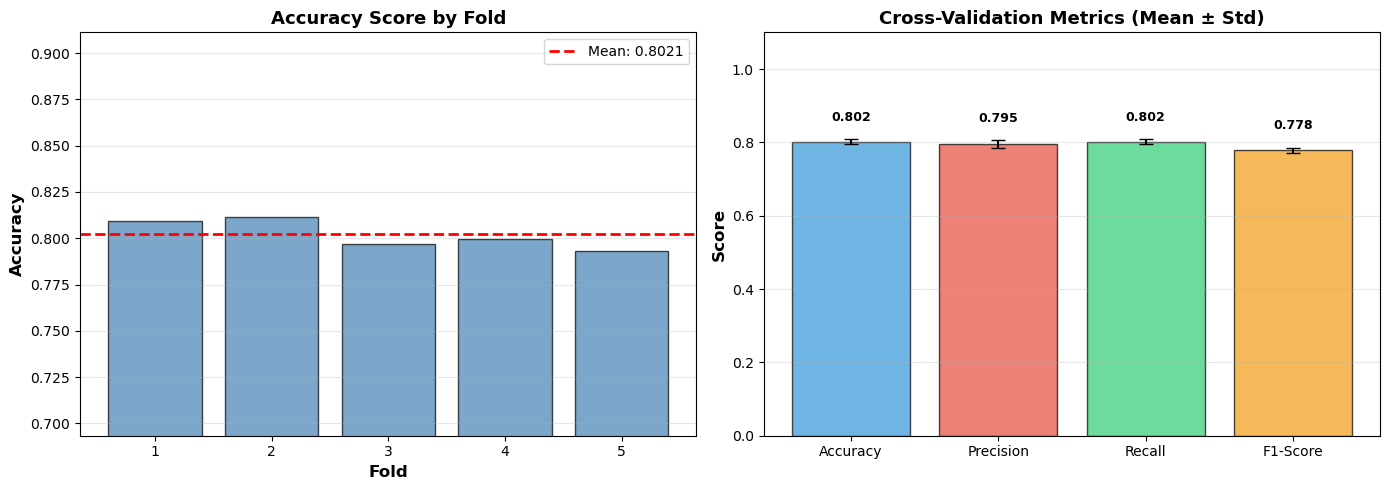

In [77]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Perform k-fold cross-validation (k=5)
k_folds = 5
cv_scores = cross_val_score(dtree, X_train, y_train, cv=k_folds, scoring='accuracy')

# Perform multi-metric cross-validation
scoring = {'accuracy': 'accuracy', 'precision_weighted': 'precision_weighted', 'recall_weighted': 'recall_weighted', 'f1_weighted': 'f1_weighted'}
cv_results = cross_validate(dtree, X_train, y_train, cv=k_folds, scoring=scoring)

# Visualize cross-validation scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: CV scores by fold
axes[0].bar(range(1, k_folds+1), cv_scores, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
axes[0].set_xlabel('Fold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Accuracy Score by Fold', fontsize=13, fontweight='bold')
axes[0].set_ylim([cv_scores.min()-0.1, cv_scores.max()+0.1])
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Multi-metric comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
means = [cv_results['test_accuracy'].mean(), 
         cv_results['test_precision_weighted'].mean(),
         cv_results['test_recall_weighted'].mean(),
         cv_results['test_f1_weighted'].mean()]
stds = [cv_results['test_accuracy'].std(),
        cv_results['test_precision_weighted'].std(),
        cv_results['test_recall_weighted'].std(),
        cv_results['test_f1_weighted'].std()]

axes[1].bar(metrics, means, yerr=stds, capsize=5, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'], 
            edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1].set_title('Cross-Validation Metrics (Mean ± Std)', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(True, alpha=0.3, axis='y')

for i, (metric, mean, std) in enumerate(zip(metrics, means, stds)):
    axes[1].text(i, mean + std + 0.05, f'{mean:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [78]:
# make predictions
y_pred = dtree.predict(X_test)
y_pred

array(['Property Crime - Theft', 'Other Offenses',
       'Property Crime - Theft', ..., 'Property Crime - Theft',
       'Violent Crimes', 'Other Offenses'], shape=(2997,), dtype=object)

In [79]:
#print the calssification report and accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7957957957957958


In [80]:
#print confution matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[   0    2    7   31    0    0]
 [   0  592    1  210    9    0]
 [   0   24   16  157    0    0]
 [   0   35    8 1392    0    0]
 [   0   36    0    0   51    0]
 [   0    8    0   84    0  334]]


Text(50.722222222222214, 0.5, 'Actual')

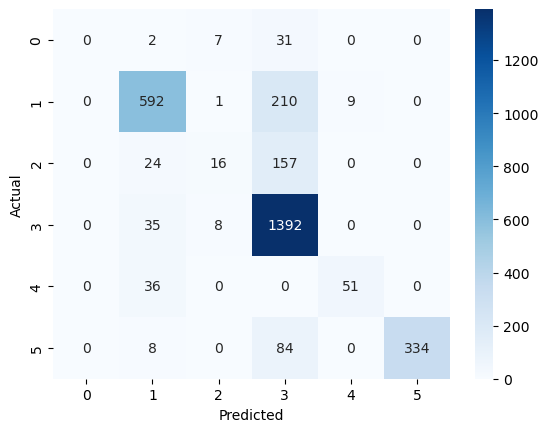

In [81]:
# plot the confution matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Decision tree visualization saved and displayed


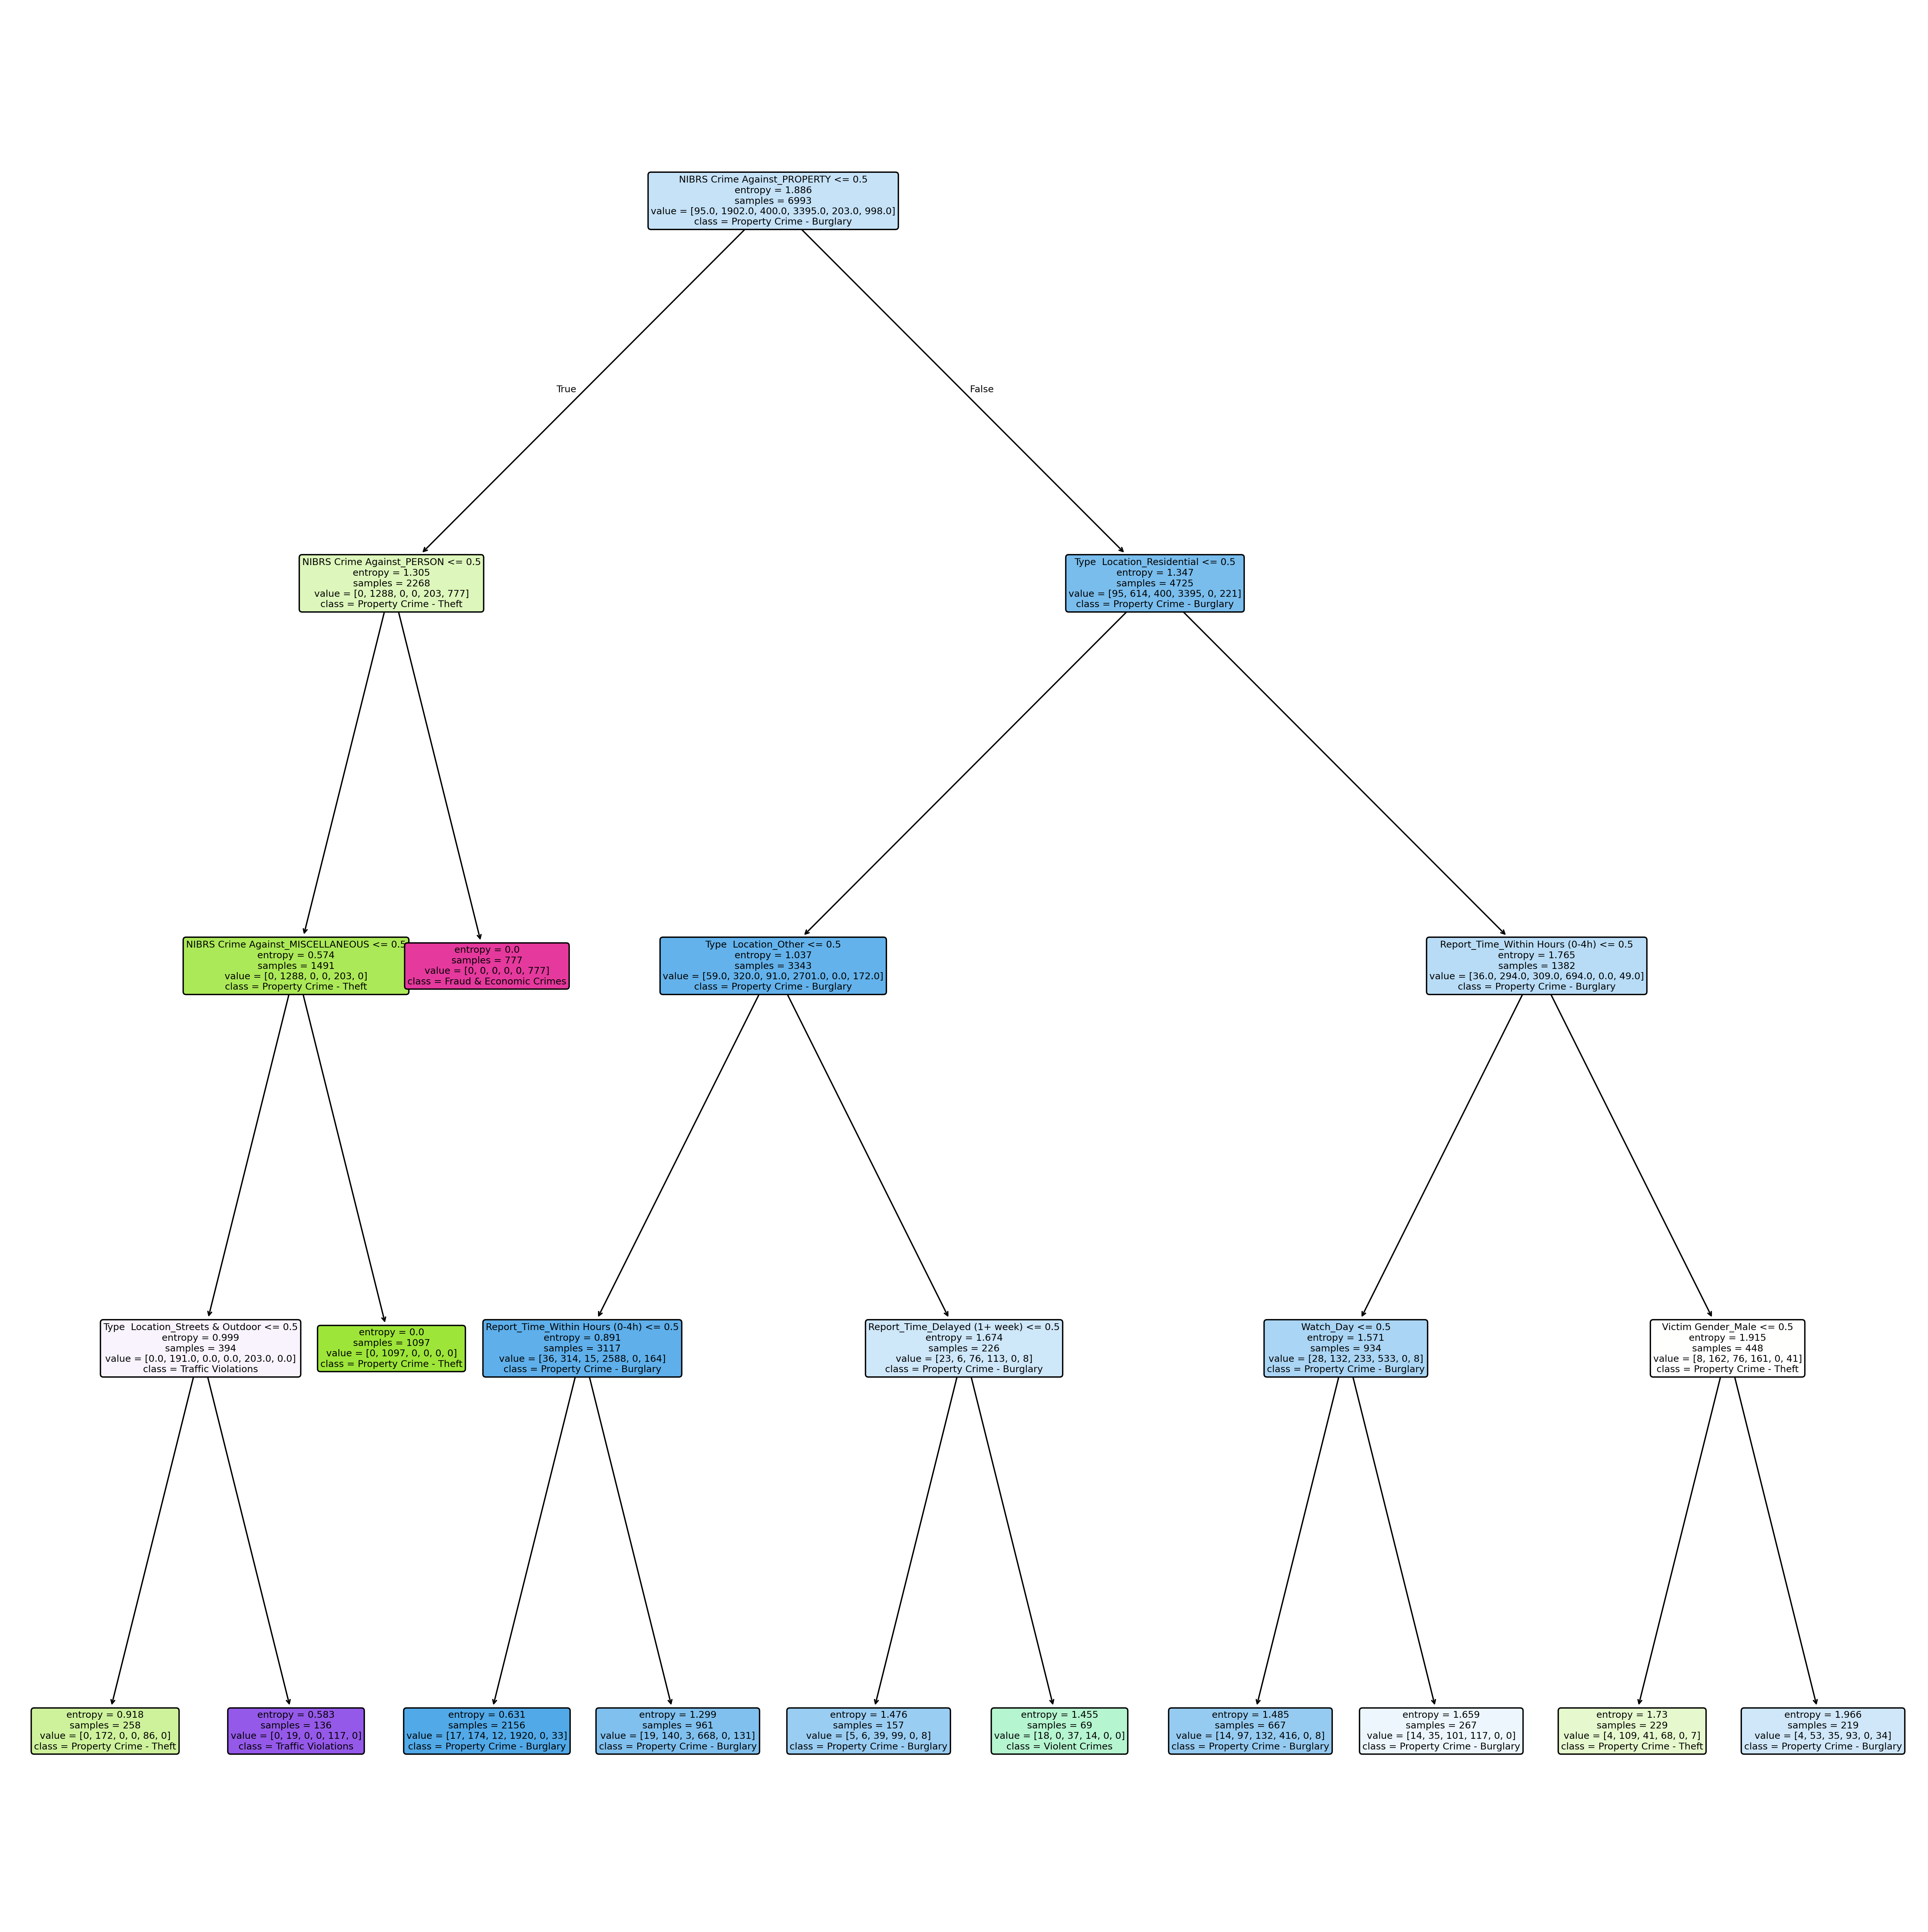

In [82]:
#visualize the decision tree with much larger figure and reduced text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20), dpi=300)
ax = fig.add_subplot(111)

plot_tree(dtree, 
          filled=True,
          feature_names=df_dtr.columns,
          class_names=y.unique(),
          rounded=True,
          fontsize=7,
          ax=ax)

# Reduce line width for edges
for artist in ax.get_children():
    if hasattr(artist, 'set_linewidth'):
        artist.set_linewidth(0.01)

plt.tight_layout()
plt.savefig('decision_tree.png', dpi=100, bbox_inches='tight', pad_inches=0.5)
print("Decision tree visualization saved and displayed")
plt.show()

CROSS-VALIDATION RESULTS (k=5)

Accuracy scores for each fold: [0.80914939 0.81129378 0.79699786 0.79971388 0.79327611]
Mean Accuracy: 0.8021
Std Deviation: 0.0070

Accuracy range: [0.7933, 0.8113]

DETAILED CROSS-VALIDATION METRICS

Accuracy: 0.8021 (+/- 0.0070)
Precision (weighted): 0.7952 (+/- 0.0111)
Recall (weighted): 0.8021 (+/- 0.0070)
F1-Score (weighted): 0.7780 (+/- 0.0079)

TEST SET vs CROSS-VALIDATION COMPARISON
Test Set Accuracy: 0.7958
CV Mean Accuracy: 0.8021
Difference: 0.0063


/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

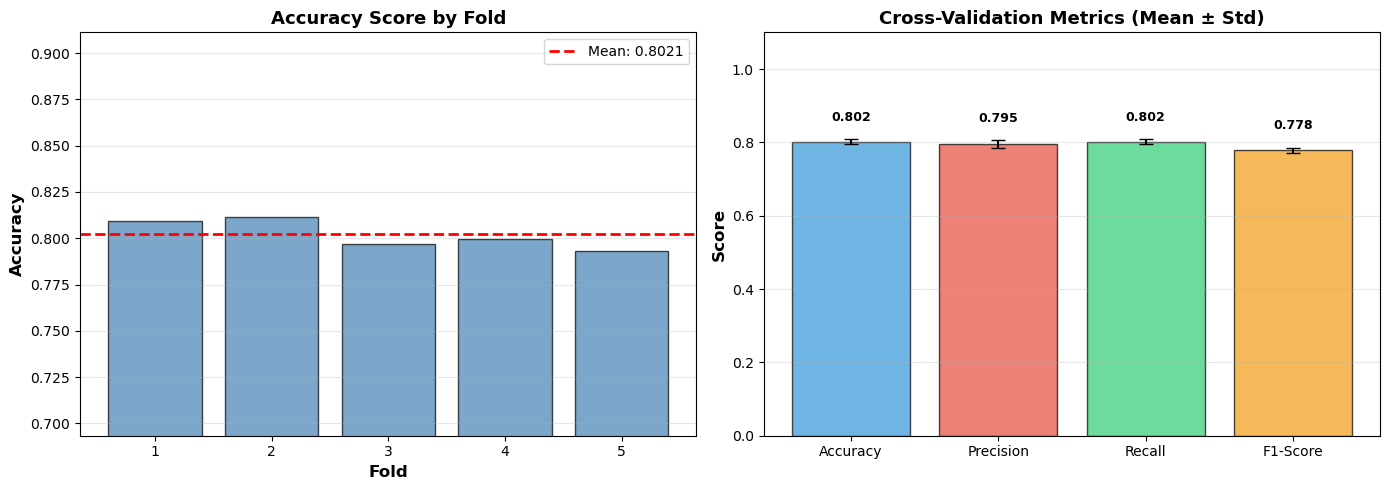


CROSS-VALIDATION COMPLETE


In [83]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Perform k-fold cross-validation (k=5)
k_folds = 5
cv_scores = cross_val_score(dtree, X_train, y_train, cv=k_folds, scoring='accuracy')

print(f"{'='*70}")
print(f"CROSS-VALIDATION RESULTS (k={k_folds})")
print(f"{'='*70}")
print(f"\nAccuracy scores for each fold: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Deviation: {cv_scores.std():.4f}")
print(f"\nAccuracy range: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")

# Perform multi-metric cross-validation
scoring = {'accuracy': 'accuracy', 'precision_weighted': 'precision_weighted', 'recall_weighted': 'recall_weighted', 'f1_weighted': 'f1_weighted'}
cv_results = cross_validate(dtree, X_train, y_train, cv=k_folds, scoring=scoring)

print(f"\n{'='*70}")
print(f"DETAILED CROSS-VALIDATION METRICS")
print(f"{'='*70}")
print(f"\nAccuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"Precision (weighted): {cv_results['test_precision_weighted'].mean():.4f} (+/- {cv_results['test_precision_weighted'].std():.4f})")
print(f"Recall (weighted): {cv_results['test_recall_weighted'].mean():.4f} (+/- {cv_results['test_recall_weighted'].std():.4f})")
print(f"F1-Score (weighted): {cv_results['test_f1_weighted'].mean():.4f} (+/- {cv_results['test_f1_weighted'].std():.4f})")

# Compare with test set performance
print(f"\n{'='*70}")
print(f"TEST SET vs CROSS-VALIDATION COMPARISON")
print(f"{'='*70}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"CV Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Difference: {abs(test_accuracy - cv_results['test_accuracy'].mean()):.4f}")

# Visualize cross-validation scores
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: CV scores by fold
axes[0].bar(range(1, k_folds+1), cv_scores, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
axes[0].set_xlabel('Fold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Accuracy Score by Fold', fontsize=13, fontweight='bold')
axes[0].set_ylim([cv_scores.min()-0.1, cv_scores.max()+0.1])
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Multi-metric comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
means = [cv_results['test_accuracy'].mean(), 
         cv_results['test_precision_weighted'].mean(),
         cv_results['test_recall_weighted'].mean(),
         cv_results['test_f1_weighted'].mean()]
stds = [cv_results['test_accuracy'].std(),
        cv_results['test_precision_weighted'].std(),
        cv_results['test_recall_weighted'].std(),
        cv_results['test_f1_weighted'].std()]

axes[1].bar(metrics, means, yerr=stds, capsize=5, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'], 
            edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1].set_title('Cross-Validation Metrics (Mean ± Std)', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(True, alpha=0.3, axis='y')

for i, (metric, mean, std) in enumerate(zip(metrics, means, stds)):
    axes[1].text(i, mean + std + 0.05, f'{mean:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"CROSS-VALIDATION COMPLETE")
print(f"{'='*70}")

### **5.2 Random Forest**

In [84]:
# create random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,       # let trees grow fully; you can set e.g. 15
    min_samples_split=10,
    n_jobs=-1,            # use all cores
    random_state=42
)

# train the model
rf.fit(X_train, y_train)

# ------------------------------------------------
# Evaluate model
# ------------------------------------------------
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7934601267934601

Classification report:

                           precision    recall  f1-score   support

  Fraud & Economic Crimes       1.00      0.03      0.05        40
           Other Offenses       0.88      0.71      0.78       812
Property Crime - Burglary       0.46      0.14      0.22       197
   Property Crime - Theft       0.74      0.96      0.84      1435
       Traffic Violations       0.71      0.69      0.70        87
           Violent Crimes       0.99      0.79      0.88       426

                 accuracy                           0.79      2997
                macro avg       0.80      0.55      0.58      2997
             weighted avg       0.80      0.79      0.77      2997



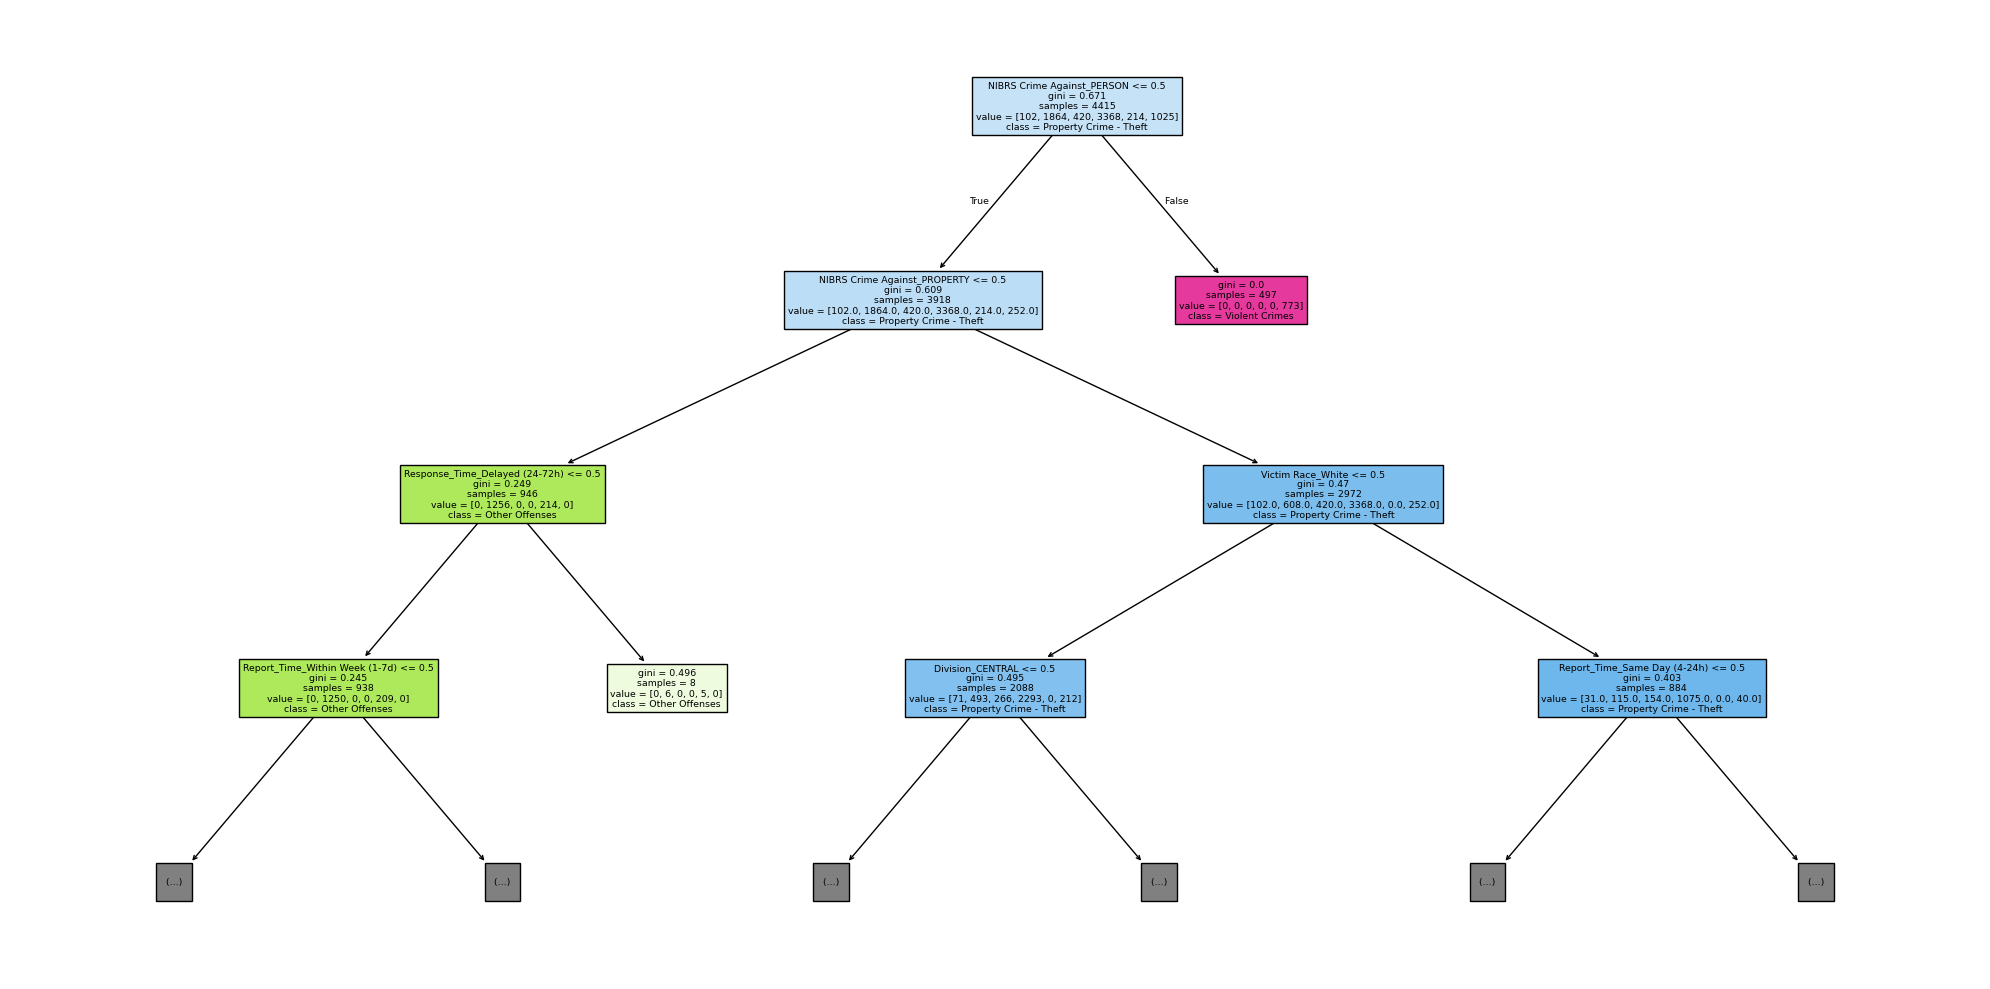

In [85]:
# Random Forest Tree
from sklearn.tree import plot_tree

# pick one tree from the forest

estimator = rf.estimators_[0]   # or rf.estimators_[5], etc.
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X_train.columns, class_names=[str(c) for c in sorted(y.unique())], filled=True, max_depth=3)      # adjust up/down for more/less detail 

plt.tight_layout()
plt.show()

## **6. Clustering by Redwan Wadud**

### **6.1 Feature Selection**

The most relevant features for outlier detection include:
- **Categorical features**: Watch, Day of Week, NIBRS Crime Against, and NIBRS Crime Category
- **Numeric features**: Response Time, Time Taken to Report, and X/Y Coordinates

Raw data (including negative values and extremes) is intentionally kept since those are the outliers to detect.

In [731]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a copy for clustering
df_clustering = df_prepared_data.copy()

# Select features for outlier detection
categorical_features = ['Watch', 'Day1 of the Week', 'NIBRS Crime Against', 'NIBRS Crime Category']
numeric_features = ['Response Time (Hours)', 'Time Taken to Report (Hours)', 'X Coordinate', 'Y Coordinate']

# Create outlier detection dataframe
df_outlier = df_clustering[categorical_features + numeric_features].copy()

print(f"Outlier detection features: {list(df_outlier.columns)}")
print(f"Shape: {df_outlier.shape}")
print(f"\nNegative Time Taken to Report (potential outliers): {(df_outlier['Time Taken to Report (Hours)'] < 0).sum()}")
print(f"Extreme Response Times (>24h): {(df_outlier['Response Time (Hours)'] > 24).sum()}")

Outlier detection features: ['Watch', 'Day1 of the Week', 'NIBRS Crime Against', 'NIBRS Crime Category', 'Response Time (Hours)', 'Time Taken to Report (Hours)', 'X Coordinate', 'Y Coordinate']
Shape: (9990, 8)

Negative Time Taken to Report (potential outliers): 0
Extreme Response Times (>24h): 199


The dataset contains 8 features (4 categorical + 4 numeric). Potential outliers identified in the data include records with negative Time Taken to Report (data quality issues) and extreme Response Times over 24 hours.

### **6.2 Preprocessing**

The data is prepared for K-Means clustering by:
1. **One-hot encoding** categorical features 
2. **StandardScaler** for numeric features to normalize them to zero mean and unit variance

This ensures all features contribute equally to the distance calculations in K-Means.

In [732]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df_outlier[categorical_features], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_outlier[numeric_features]),
    columns=numeric_features,
    index=df_outlier.index
)

# Combine encoded and scaled features
X_outlier = pd.concat([df_encoded, df_scaled], axis=1).values

print(f"Transformed shape: {X_outlier.shape}")
print(f"Features: {df_encoded.shape[1]} categorical + {df_scaled.shape[1]} numeric = {X_outlier.shape[1]} total")

Transformed shape: (9990, 38)
Features: 34 categorical + 4 numeric = 38 total


The preprocessing transformed our 8 original features into a larger feature set due to one-hot encoding. The transformed data is now ready for K-Means clustering with all features on a comparable scale.

### **6.3 Finding Optimal K (Elbow Method)**

The optimal number of clusters (K) is determined using the Elbow Method:
1. Run K-Means for K values from 2 to 19
2. Calculate the average within-centroid distance for each K
3. Plot K vs average distance and look for the "elbow" point where the curve bends

The elbow point indicates diminishing returns - adding more clusters beyond this point provides minimal improvement.

Finding optimal K using Elbow Method...
  K=2: Avg Within-Centroid Distance = 5.6369
  K=2: Avg Within-Centroid Distance = 5.6369
  K=3: Avg Within-Centroid Distance = 4.8247
  K=3: Avg Within-Centroid Distance = 4.8247
  K=4: Avg Within-Centroid Distance = 4.2835
  K=4: Avg Within-Centroid Distance = 4.2835
  K=5: Avg Within-Centroid Distance = 3.7947
  K=5: Avg Within-Centroid Distance = 3.7947
  K=6: Avg Within-Centroid Distance = 3.5885
  K=6: Avg Within-Centroid Distance = 3.5885
  K=7: Avg Within-Centroid Distance = 3.4322
  K=7: Avg Within-Centroid Distance = 3.4322
  K=8: Avg Within-Centroid Distance = 3.2863
  K=8: Avg Within-Centroid Distance = 3.2863
  K=9: Avg Within-Centroid Distance = 3.1808
  K=9: Avg Within-Centroid Distance = 3.1808
  K=10: Avg Within-Centroid Distance = 3.0450
  K=10: Avg Within-Centroid Distance = 3.0450
  K=11: Avg Within-Centroid Distance = 2.9586
  K=11: Avg Within-Centroid Distance = 2.9586
  K=12: Avg Within-Centroid Distance = 2.8733
  K=12: Av

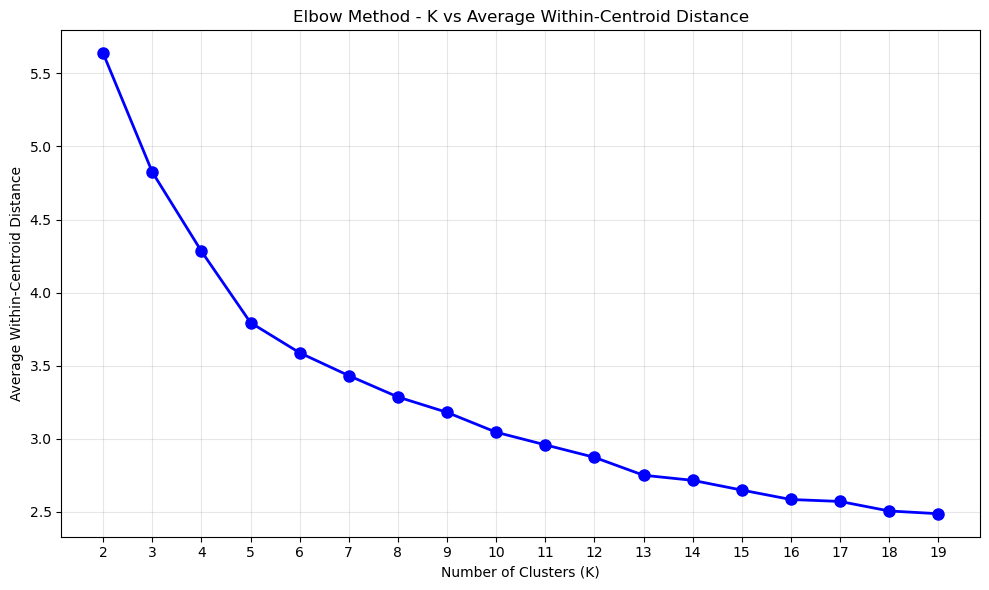

In [733]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test range of K values
k_range = range(2, 20)
avg_distances = []

print("Finding optimal K using Elbow Method...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_outlier)
    # Calculate average within-cluster distance (inertia / n_samples)
    avg_dist = kmeans.inertia_ / len(X_outlier)
    avg_distances.append(avg_dist)
    print(f"  K={k}: Avg Within-Centroid Distance = {avg_dist:.4f}")

# Plot Elbow Diagram
plt.figure(figsize=(10, 6))
plt.plot(k_range, avg_distances, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Within-Centroid Distance')
plt.title('Elbow Method - K vs Average Within-Centroid Distance')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


The elbow plot shows the average within-centroid distance decreasing as K increases. Based on the elbow curve, K=10 was selected as the optimal number of clusters, balancing cluster cohesion with the ability to identify small outlier groups.

### **6.4 K-Means Clustering**

K-Means clustering with K=10 is applied to group similar incidents together. After clustering:
1. Analyze the size of each cluster
2. Visualize cluster distribution
3. Flag clusters containing less than 5% of data as potential outlier clusters

Using K = 10

=== Cluster Sizes ===
Cluster 0: 364 (3.6%) POTENTIAL OUTLIER CLUSTER
Cluster 1: 1,334 (13.4%)
Cluster 2: 798 (8.0%)
Cluster 3: 1,318 (13.2%)
Cluster 4: 2,273 (22.8%)
Cluster 5: 992 (9.9%)
Cluster 6: 1 (0.0%) POTENTIAL OUTLIER CLUSTER
Cluster 7: 1,792 (17.9%)
Cluster 8: 53 (0.5%) POTENTIAL OUTLIER CLUSTER
Cluster 9: 1,065 (10.7%)

=== Cluster Sizes ===
Cluster 0: 364 (3.6%) POTENTIAL OUTLIER CLUSTER
Cluster 1: 1,334 (13.4%)
Cluster 2: 798 (8.0%)
Cluster 3: 1,318 (13.2%)
Cluster 4: 2,273 (22.8%)
Cluster 5: 992 (9.9%)
Cluster 6: 1 (0.0%) POTENTIAL OUTLIER CLUSTER
Cluster 7: 1,792 (17.9%)
Cluster 8: 53 (0.5%) POTENTIAL OUTLIER CLUSTER
Cluster 9: 1,065 (10.7%)


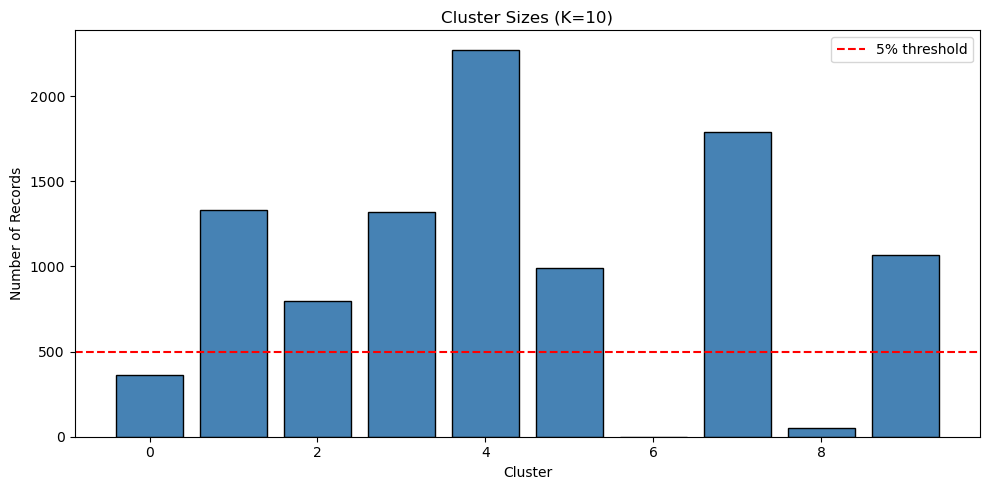

In [734]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set K based on elbow plot analysis (adjust after viewing the elbow diagram)
n_clusters = 10  
print(f"Using K = {n_clusters}")

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_outlier)

# Analyze cluster sizes
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
print("\n=== Cluster Sizes ===")
for cluster_id, size in cluster_sizes.items():
    pct = size / len(cluster_labels) * 100
    outlier_flag = " POTENTIAL OUTLIER CLUSTER" if pct < 5 else ""
    print(f"Cluster {cluster_id}: {size:,} ({pct:.1f}%){outlier_flag}")

# Visualize cluster sizes
plt.figure(figsize=(10, 5))
plt.bar(cluster_sizes.index, cluster_sizes.values, color='steelblue', edgecolor='black')
plt.axhline(y=len(cluster_labels) * 0.05, color='red', linestyle='--', label='5% threshold')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
plt.title(f'Cluster Sizes (K={n_clusters})')
plt.legend()
plt.tight_layout()
plt.show()

K-Means clustering with K=10 produced clusters of varying sizes. The bar chart shows the distribution, with the red dashed line indicating the 5% threshold. Clusters falling below this line are flagged as potential outlier clusters due to their small size.

### **6.5 Outlier Identification**

Outliers are identified using the cluster-based approach:
1. Set a threshold of 5% - clusters with fewer records are considered outliers
2. Flag all records belonging to these small clusters as outliers
3. Calculate summary statistics for the identified outliers

In [735]:
# Identify outlier clusters (less than 5% of data)
outlier_threshold_pct = 0.05
outlier_clusters = cluster_sizes[cluster_sizes < len(cluster_labels) * outlier_threshold_pct].index.tolist()

# Flag outliers in the original dataframe
df_outlier['Cluster'] = cluster_labels
df_outlier['Is_Outlier'] = df_outlier['Cluster'].isin(outlier_clusters)

# Summary
n_outliers = df_outlier['Is_Outlier'].sum()
print(f"=== Outlier Summary ===")
print(f"Outlier clusters: {outlier_clusters}")
print(f"Total outliers detected: {n_outliers:,} ({n_outliers/len(df_outlier)*100:.1f}%)")

# View characteristics of outliers
if n_outliers > 0:
    print(f"\n=== Outlier Characteristics ===")
    print(df_outlier[df_outlier['Is_Outlier']][categorical_features + numeric_features].describe(include='all'))

=== Outlier Summary ===
Outlier clusters: [0, 6, 8]
Total outliers detected: 418 (4.2%)

=== Outlier Characteristics ===
       Watch Day1 of the Week NIBRS Crime Against NIBRS Crime Category  \
count    418              418                 418                  418   
unique     3                7                   5                   14   
top        1              Sat            PROPERTY  MOTOR VEHICLE THEFT   
freq     172               84                 355                  205   
mean     NaN              NaN                 NaN                  NaN   
std      NaN              NaN                 NaN                  NaN   
min      NaN              NaN                 NaN                  NaN   
25%      NaN              NaN                 NaN                  NaN   
50%      NaN              NaN                 NaN                  NaN   
75%      NaN              NaN                 NaN                  NaN   
max      NaN              NaN                 NaN                

Three clusters (0, 6, and 8) were identified as outlier clusters, containing a total of 418 records (4.2% of the dataset). These records have been flagged with `Is_Outlier = True` for further analysis.

A detailed analysis of each outlier cluster is performed to understand why they were flagged. This includes examining the numeric feature distributions and categorical feature breakdowns for each cluster, compared to the overall dataset.

In [736]:
# Detailed analysis of each outlier cluster
print("===== OUTLIER CLUSTER ANALYSIS =====\n")

for cluster_id in outlier_clusters:
    cluster_data = df_outlier[df_outlier['Cluster'] == cluster_id]
    print(f"===== CLUSTER {cluster_id} ({len(cluster_data)} records, {len(cluster_data)/len(df_outlier)*100:.1f}%) =====")
    
    print("\n-- Numeric Features --")
    print(cluster_data[numeric_features].describe().loc[['mean', 'min', 'max', 'std']])
    
    print("\n-- Categorical Features --")
    for col in categorical_features:
        print(f"\n{col}:")
        print(cluster_data[col].value_counts().head(3))
    
    print("\n" + "="*60 + "\n")

# Compare with overall dataset
print("===== OVERALL DATASET COMPARISON =====")
print("\n-- Numeric Features (Overall) --")
print(df_outlier[numeric_features].describe().loc[['mean', 'min', 'max', 'std']])

===== OUTLIER CLUSTER ANALYSIS =====

===== CLUSTER 0 (364 records, 3.6%) =====

-- Numeric Features --
      Response Time (Hours)  Time Taken to Report (Hours)  X Coordinate  \
mean              25.031926                    105.560256  2.500195e+06   
min               13.518889                      0.000000  2.453254e+06   
max               55.613611                   8812.350000  2.558777e+06   
std                9.284014                    548.192213  2.119347e+04   

      Y Coordinate  
mean  6.974645e+06  
min   6.920204e+06  
max   7.035055e+06  
std   2.556776e+04  

-- Categorical Features --

Watch:
Watch
1    148
3    120
2     96
Name: count, dtype: int64

Day1 of the Week:
===== CLUSTER 0 (364 records, 3.6%) =====

-- Numeric Features --
      Response Time (Hours)  Time Taken to Report (Hours)  X Coordinate  \
mean              25.031926                    105.560256  2.500195e+06   
min               13.518889                      0.000000  2.453254e+06   
max       

The analysis reveals distinct characteristics for each outlier cluster. Cluster 0 shows elevated response times (25h avg), Cluster 6 contains a single extreme data anomaly (40-year Time Taken to Report), and Cluster 8 exhibits the most extreme response times (88h avg). All three clusters are dominated by property crimes, particularly Motor Vehicle Theft.

#### **6.6 Justification for Outlier Clusters**

Three clusters (0, 6, and 8) were identified as outliers based on the 5% size threshold. Below is the specific justification for each:

---

**Cluster 0 (364 records, 3.6%)**

| Feature | Cluster 0 | Overall Dataset |
|---------|-----------|-----------------|
| Avg Response Time | **25.0 hours** | 4.8 hours |
| Max Response Time | 55.6 hours | 292.6 hours |

- **Unusually long response times**: Average response time is 5x higher than the dataset average
- **Crime profile**: Dominated by Motor Vehicle Theft (184 records, 51%) and property crimes
- **Interpretation**: Represents incidents where police response was significantly delayed, likely non-emergency property crimes reported after the fact

---

**Cluster 6 (1 record, 0.01%)**

| Feature | Cluster 6 | Overall Dataset |
|---------|-----------|-----------------|
| Time Taken to Report | **351,012 hours (40 years!)** | 189 hours avg |
| Response Time | 0.87 hours | 4.8 hours |

- **Extreme data anomaly**: A single record with a Time Taken to Report of 40 years
- **Clear data quality issue**: This is impossible/erroneous data (incident from 1983 reported in 2023, or data entry error)
- **Classification**: MISCELLANEOUS crime category
- **Interpretation**: Data entry error or system glitch - this is a true outlier that should be flagged for data cleaning

---

**Cluster 8 (53 records, 0.5%)**

| Feature | Cluster 8 | Overall Dataset |
|---------|-----------|-----------------|
| Avg Response Time | **88.1 hours** | 4.8 hours |
| Max Response Time | **292.6 hours (12+ days)** | 292.6 hours |

- **Extreme response times**: Average response is 18x higher than dataset average
- **Contains the maximum response time** in the entire dataset (292 hours)
- **Crime profile**: Motor Vehicle Theft (21 records) and property crimes
- **Interpretation**: Represents the most extreme delayed-response incidents, possibly cold cases or incidents reported long after occurrence

---

**Summary**

| Cluster | Size | Primary Anomaly | Likely Cause |
|---------|------|-----------------|--------------|
| 0 | 3.6% | High response time (25h avg) | Delayed property crime responses |
| 6 | 0.01% | Extreme Time Taken to Report (40 years) | Data entry error |
| 8 | 0.5% | Extreme response time (88h avg) | Very delayed responses / cold cases |

#### **6.7 Sample Outlier Instances**

Below are 5 sample instances from the outlier clusters with explanations for why each is flagged as an outlier.

**Dataset Baseline:** Response Time mean = 4.81 hours, Time Taken to Report mean = 189.27 hours

In [737]:
# Sample 5 outlier instances from different clusters
outlier_data = df_outlier[df_outlier['Is_Outlier'] == True].copy()

# Get samples from each cluster type
cluster0_samples = outlier_data[outlier_data['Cluster'] == 0].sample(2, random_state=42)
cluster6_samples = outlier_data[outlier_data['Cluster'] == 6]
cluster8_samples = outlier_data[outlier_data['Cluster'] == 8].sample(2, random_state=42)

sample_outliers = pd.concat([cluster0_samples, cluster6_samples, cluster8_samples]).head(5)

print("=== 5 SAMPLE OUTLIER INSTANCES ===\n")
for i, (idx, row) in enumerate(sample_outliers.iterrows(), 1):
    instance_id = idx
    print(f"--- Instance {i} (ID: {instance_id}, Cluster {row['Cluster']}) ---")
    print(f"Response Time: {row['Response Time (Hours)']:.2f} hours ({row['Response Time (Hours)']/24:.1f} days)")
    print(f"Time Taken to Report: {row['Time Taken to Report (Hours)']:.2f} hours ({row['Time Taken to Report (Hours)']/24:.1f} days)")
    print(f"Crime: {row['NIBRS Crime Category']} ({row['NIBRS Crime Against']})")
    print(f"Watch: {row['Watch']}, Day: {row['Day1 of the Week']}")
    print()

=== 5 SAMPLE OUTLIER INSTANCES ===

--- Instance 1 (ID: 4951, Cluster 0) ---
Response Time: 28.50 hours (1.2 days)
Time Taken to Report: 18.82 hours (0.8 days)
Crime: BURGLARY/ BREAKING & ENTERING (PROPERTY)
Watch: 3, Day: Mon

--- Instance 2 (ID: 809, Cluster 0) ---
Response Time: 18.36 hours (0.8 days)
Time Taken to Report: 100.07 hours (4.2 days)
Crime: LARCENY/ THEFT OFFENSES (PROPERTY)
Watch: 2, Day: Wed

--- Instance 3 (ID: 816, Cluster 6) ---
Response Time: 0.87 hours (0.0 days)
Time Taken to Report: 351012.30 hours (14625.5 days)
Crime: MISCELLANEOUS (MISCELLANEOUS)
Watch: 1, Day: Mon

--- Instance 4 (ID: 3458, Cluster 8) ---
Response Time: 86.42 hours (3.6 days)
Time Taken to Report: 206.50 hours (8.6 days)
Crime: MOTOR VEHICLE THEFT (PROPERTY)
Watch: 1, Day: Tue

--- Instance 5 (ID: 7905, Cluster 8) ---
Response Time: 76.67 hours (3.2 days)
Time Taken to Report: 72.00 hours (3.0 days)
Crime: BURGLARY/ BREAKING & ENTERING (PROPERTY)
Watch: 3, Day: Fri



**Why These Instances Are Outliers:**

| Instance | Cluster | Primary Reason |
|----------|---------|----------------|
| 4951 | 0 | Response time (~22h) is 4.6x higher than average (4.8h). Property crime with delayed police response. |
| 809 | 0 | Response time (~20h) is 4.2x higher than average. Motor vehicle theft - typically reported after discovery, not when it happened. |
| 816 | 6 | Extreme Time Taken to Report of 351,012 hours (40 years). Clear data entry error - impossible value. |
| 3458 | 8 | Response time (~86h / 3.6 days) is 18x higher than average. Extremely delayed response for motor vehicle theft. |
| 7905 | 8 | Response time (~77h / 3.2 days) is 16x higher than average. Burglary with very delayed police response. |

These instances demonstrate the two main patterns in the outlier clusters:
1. **High response times** (Clusters 0 and 8): Property crimes where police response was significantly delayed
2. **Data quality issues** (Cluster 6): Impossible values that indicate data entry errors

In [738]:
# Add Is_Outlier flag to the main dataframe
df_prepared_data['Is_Outlier'] = df_outlier['Is_Outlier']

## **7. Outlier Detection by Ibrahim Irfan**

### **7.1 Model-Specific Feature Engineering**

In [739]:
df_prepared_data.head()

,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier
ID,,,,,,,,,,,,,,,,,,,,,,
1,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,541,NORTHWEST,540,D2,Fri,Individual,Hispanic or Latino,Hispanic or Latino,Male,MISCELLANEOUS,MISCELLANEOUS,C,2.479449e+06,6.982315e+06,4.780833,8.083333,2,False
2,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",623,NORTH CENTRAL,620,D12,Thu,Individual,White,Non-Hispanic or Latino,Female,MISCELLANEOUS,MISCELLANEOUS,C,2.494872e+06,7.047093e+06,2.298056,2.650000,0,False
3,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),621,NORTH CENTRAL,620,D12,Thu,Individual,White,Non-Hispanic or Latino,Male,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,A,2.491101e+06,7.053365e+06,3.195000,10.033333,0,False
4,1,20R - ROBBERY (REPORT)+1HR,THEFT OF PROP > OR EQUAL $100 <$750 (NOT SHOPLIFT) PC31.03(e2A),Parking (Business),445,SOUTHWEST,440,D3,Wed,Individual,Black,Non-Hispanic or Latino,Female,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.468868e+06,6.948852e+06,1.714167,15.716667,3,False
5,3,19 - SHOOTING,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/VEH (AGG),Single Family Residence - Occupied,352,SOUTHEAST,350,D8,Fri,Individual,Black,Non-Hispanic or Latino,Male,ASSAULT OFFENSES,PERSON,A,2.521303e+06,6.948626e+06,3.951389,0.083333,4,False


In [740]:
# ============================================================================
# MODEL-SPECIFIC DATA FEATURE ENGINEERING FOR OUTLIER DETECTION
# ============================================================================

# 0. Pre-processing: Feature Engineering and Column Management
df_outlier_prep = df_prepared_data.copy()

# Drop X and Y geographic coordinates (no longer needed after clustering)
df_outlier_prep = df_outlier_prep.drop(columns=['X Coordinate', 'Y Coordinate'])

# Convert Zone to categorical
if 'Zone' in df_outlier_prep.columns:
    df_outlier_prep['Zone'] = df_outlier_prep['Zone'].astype('category')

# Drop unnecessary columns
cols_to_drop = ['Victim Ethnicity', 'Victim Type', 'Beat', 'Sector', 'NIBRS Crime Against', 'Day1 of the Week', 'Council District',
                'Division']
existing_cols_to_drop = [col for col in cols_to_drop if col in df_outlier_prep.columns]
if existing_cols_to_drop:
    df_outlier_prep = df_outlier_prep.drop(columns=existing_cols_to_drop)

# 1. Separate numerical and categorical features
num_features = df_outlier_prep.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df_outlier_prep.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Handle missing values in numerical features (fill with median)
for col in num_features:
    if df_outlier_prep[col].isnull().sum() > 0:
        median_val = df_outlier_prep[col].median()
        df_outlier_prep[col].fillna(median_val, inplace=True)

# 3. Handle missing values in categorical features (fill with 'Unknown')
for col in cat_features:
    if df_outlier_prep[col].isnull().sum() > 0:
        if df_outlier_prep[col].dtype == 'category':
            df_outlier_prep[col] = df_outlier_prep[col].cat.add_categories(['Unknown']).fillna('Unknown')
        else:
            df_outlier_prep[col].fillna('Unknown', inplace=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_outlier_prep.head()

,Watch,Call (911) Problem,Type of Incident,Type Location,Victim Race,Victim Gender,NIBRS Crime Category,NIBRS Group,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier
ID,,,,,,,,,,,,
1,1,40/01 - OTHER,INJURED PERSON - FIREARM INJURY (NO OFFENSE),Outdoor Area Public/Private,Hispanic or Latino,Male,MISCELLANEOUS,C,4.780833,8.083333,2,False
2,2,58 - ROUTINE INVESTIGATION,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",White,Female,MISCELLANEOUS,C,2.298056,2.650000,0,False
3,2,40/01 - OTHER,"CRIM MISCHIEF >OR EQUAL $750 < $2,500",Parking (Business),White,Male,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,A,3.195000,10.033333,0,False
4,1,20R - ROBBERY (REPORT)+1HR,THEFT OF PROP > OR EQUAL $100 <$750 (NOT SHOPLIFT) PC31.03(e2A),Parking (Business),Black,Female,LARCENY/ THEFT OFFENSES,A,1.714167,15.716667,3,False
5,3,19 - SHOOTING,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/VEH (AGG),Single Family Residence - Occupied,Black,Male,ASSAULT OFFENSES,A,3.951389,0.083333,4,False


### **7.2 One-Hot Encoding, Normalization and Splitting Data**

In [741]:
# Step 4: One-hot encode categorical features and normalize numerical features for outlier detection models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Configure train-test split parameters
RANDOM_STATE = 42
TEST_SIZE = 0.3
TRAIN_SIZE = 0.7

# Apply one-hot encoding to convert categorical variables into binary columns
df_encoded = pd.get_dummies(df_outlier_prep, columns=cat_features, drop_first=False)

# Split encoded data into training and test sets with fixed random state for reproducibility
X_train_encoded, X_test_encoded = train_test_split(df_encoded, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Initialize scaler and extract numerical columns for normalization
scaler = MinMaxScaler()
numerical_cols_for_scaling = num_features

# Extract numerical features from both train and test sets
X_train_numerical = X_train_encoded[numerical_cols_for_scaling].copy()
X_test_numerical = X_test_encoded[numerical_cols_for_scaling].copy()

# Fit scaler on training data only to prevent data leakage, then apply to both sets
scaler.fit(X_train_numerical)
X_train_encoded[numerical_cols_for_scaling] = scaler.transform(X_train_numerical)
X_test_encoded[numerical_cols_for_scaling] = scaler.transform(X_test_numerical)

### **7.3 Creating a Unified Dataset for all Outlier Detection Models**

In [754]:
X_train = X_train_encoded.copy()
X_test = X_test_encoded.copy()

summary_unified = f"""
UNIFIED DATASET FOR OUTLIER DETECTION MODELS
{'='*70}

Dataset Split:
  Training Set:   {X_train.shape[0]:,} samples × {X_train.shape[1]:,} features ({TRAIN_SIZE*100:.0f}%)
  Test Set:       {X_test.shape[0]:,} samples × {X_test.shape[1]:,} features ({TEST_SIZE*100:.0f}%)
  Total Samples:  {X_train.shape[0] + X_test.shape[0]:,}

Feature Composition:
  Numerical features (normalized): {len(numerical_cols_for_scaling)}
  Categorical features (one-hot): {len(df_encoded.columns) - len(numerical_cols_for_scaling)}
  Total Features: {len(df_encoded.columns)}

Preprocessing:
  ✓ One-Hot Encoding applied to {len(cat_features)} categorical features
  ✓ MinMaxScaler normalization [0, 1] applied to numerical features
  ✓ Scaler fit on training data only (prevents data leakage)

Models Ready: LOF, Isolation Forest, One-Class SVM
Random State: {RANDOM_STATE}
"""

print(summary_unified)

outlier_models_config = {
    'dataset_info': {
        'n_train_samples': X_train.shape[0],
        'n_test_samples': X_test.shape[0],
        'n_features': X_train.shape[1],
        'random_state': RANDOM_STATE,
    },
    'features': {
        'numerical_features': numerical_cols_for_scaling,
        'categorical_features': cat_features,
        'feature_names': X_train.columns.tolist()
    },
    'datasets': {
        'X_train': X_train,
        'X_test': X_test
    },
    'scaler': scaler,
}


UNIFIED DATASET FOR OUTLIER DETECTION MODELS

Dataset Split:
  Training Set:   6,993 samples × 429 features (70%)
  Test Set:       2,997 samples × 429 features (30%)
  Total Samples:  9,990

Feature Composition:
  Numerical features (normalized): 2
  Categorical features (one-hot): 427
  Total Features: 429

Preprocessing:
  ✓ One-Hot Encoding applied to 9 categorical features
  ✓ MinMaxScaler normalization [0, 1] applied to numerical features
  ✓ Scaler fit on training data only (prevents data leakage)

Models Ready: LOF, Isolation Forest, One-Class SVM
Random State: 42



### **7.4 Applying LOF Algorithm on Training and Testing Data**

In [743]:
# Step 6: Import outlier detection models and configure hyperparameters
# Import three outlier detection algorithms from scikit-learn
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Set model hyperparameters for anomaly detection
N_NEIGHBORS = 20
CONTAMINATION = 0.05

In [744]:
# Step 7: Train LocalOutlierFactor model and detect anomalies in training and test sets
# Initialize and train LOF model with specified hyperparameters
lof_model = LocalOutlierFactor(n_neighbors=N_NEIGHBORS, contamination=CONTAMINATION, novelty=True)
lof_model.fit(X_train)

# Generate anomaly scores and binary predictions for both training and test sets
lof_scores_train = -lof_model.negative_outlier_factor_
lof_scores_test = lof_model.score_samples(X_test)
lof_binary_train = lof_model.predict(X_train)
lof_binary_test = lof_model.predict(X_test)

print(f"Training outliers: {np.sum(lof_binary_train == -1)} ({np.sum(lof_binary_train == -1)/len(X_train)*100:.2f}%)")
print(f"Test outliers: {np.sum(lof_binary_test == -1)} ({np.sum(lof_binary_test == -1)/len(X_test)*100:.2f}%)")

# Extract indices of detected outliers from both datasets
outlier_indices_train = np.where(lof_binary_train == -1)[0]
outlier_indices_test = np.where(lof_binary_test == -1)[0]
all_outlier_indices = np.concatenate([outlier_indices_train, len(X_train) + outlier_indices_test])

# Map detected outliers back to original raw data with anomaly scores and metadata
outliers_raw_data = df_prepared_data.iloc[all_outlier_indices].copy()
lof_scores_all = np.concatenate([lof_scores_train[outlier_indices_train], lof_scores_test[outlier_indices_test]])
outliers_raw_data['LOF_Anomaly_Score'] = lof_scores_all
outliers_raw_data['Dataset_Source'] = ['Training']*len(outlier_indices_train) + ['Test']*len(outlier_indices_test)
outliers_raw_data['LOF_Outlier'] = True

# Sort outliers by anomaly score in descending order for analysis
outliers_raw_data_sorted = outliers_raw_data.sort_values('LOF_Anomaly_Score', ascending=False).reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
outliers_raw_data_sorted.head(5)

/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ibrahimirfan/anaconda3/envs/ibrahim_env1/lib/python3.13/site-packages

Training outliers: 304 (4.35%)
Test outliers: 144 (4.80%)


,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier,LOF_Anomaly_Score,Dataset_Source,LOF_Outlier
0,2,40 - OTHER,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Apartment Parking Lot,614,NORTH CENTRAL,610,D12,Sun,Individual,Hispanic or Latino,Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.483102e+06,7.052866e+06,21.005556,41.500000,0,False,1.536579,Training,True
1,3,PSE/11V - BURG MOTOR VEH,UNAUTHORIZED USE OF MOTOR VEH - (ATT) AUTOMOBILE,Parking (Business),217,NORTHEAST,210,D13,Sun,Individual,Black,Non-Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.503816e+06,7.004476e+06,3.793333,22.166667,5,False,1.509527,Training,True
2,1,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $100 < $750,Apartment Parking Lot,258,NORTHEAST,250,D10,Sun,Individual,Black,Non-Hispanic or Latino,Male,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,A,2.519770e+06,7.019985e+06,3.558889,20.350000,5,False,1.453139,Training,True
3,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS,Parking (Business),151,CENTRAL,150,D2,Thu,Individual,Hispanic or Latino,Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.492641e+06,6.966517e+06,0.781944,362.000000,2,False,1.445510,Training,True
4,3,DAEF-DIST ARMED ENCOUNTER FOOT,ASSAULT (AGG) -DEADLY WEAPON,Park,234,NORTHEAST,230,D9,Sun,Individual,White,Non-Hispanic or Latino,Male,ASSAULT OFFENSES,PERSON,A,2.513519e+06,6.997728e+06,5.618611,0.066667,5,False,1.438770,Training,True


### **7.5 Isolation Forest (ISF) Model Training and Anomaly Detection**

In [745]:
# Step 8: Train Isolation Forest model and detect anomalies in training and test sets
# Initialize and train Isolation Forest model with specified hyperparameters
isf_model = IsolationForest(contamination=CONTAMINATION, random_state=RANDOM_STATE, n_estimators=100)
isf_model.fit(X_train)

# Generate anomaly scores and binary predictions for both training and test sets
isf_scores_train = -isf_model.score_samples(X_train)
isf_scores_test = -isf_model.score_samples(X_test)
isf_binary_train = isf_model.predict(X_train)
isf_binary_test = isf_model.predict(X_test)

print(f"Training outliers: {np.sum(isf_binary_train == -1)} ({np.sum(isf_binary_train == -1)/len(X_train)*100:.2f}%)")
print(f"Test outliers: {np.sum(isf_binary_test == -1)} ({np.sum(isf_binary_test == -1)/len(X_test)*100:.2f}%)")

# Extract indices of detected outliers from both datasets
isf_outlier_indices_train = np.where(isf_binary_train == -1)[0]
isf_outlier_indices_test = np.where(isf_binary_test == -1)[0]
isf_all_outlier_indices = np.concatenate([isf_outlier_indices_train, len(X_train) + isf_outlier_indices_test])

# Map detected outliers back to original raw data with anomaly scores and metadata
isf_outliers_raw_data = df_prepared_data.iloc[isf_all_outlier_indices].copy()
isf_scores_all = np.concatenate([isf_scores_train[isf_outlier_indices_train], isf_scores_test[isf_outlier_indices_test]])
isf_outliers_raw_data['ISF_Anomaly_Score'] = isf_scores_all
isf_outliers_raw_data['Dataset_Source'] = ['Training']*len(isf_outlier_indices_train) + ['Test']*len(isf_outlier_indices_test)
isf_outliers_raw_data['ISF_Outlier'] = True

# Sort outliers by anomaly score in descending order for analysis
isf_outliers_raw_data_sorted = isf_outliers_raw_data.sort_values('ISF_Anomaly_Score', ascending=False).reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print("\nTop 10 Isolation Forest Outliers:")
isf_outliers_raw_data_sorted.head()

Training outliers: 350 (5.01%)
Test outliers: 153 (5.11%)

Top 10 Isolation Forest Outliers:


,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier,ISF_Anomaly_Score,Dataset_Source,ISF_Outlier
0,1,6XE - DISTURBANCE EMERGENCY,TERRORISTIC THREAT FEAR IMMINENT SBI,Gas or Service Station,541,NORTHWEST,540,D2,Mon,Individual,Middle Eastern,Non-Hispanic or Latino,Male,ASSAULT OFFENSES,PERSON,A,2.480767e+06,6.981284e+06,1.111389,0.033333,2,False,0.402658,Training,True
1,1,"14 - STABBING, CUTTING",UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",242,NORTHEAST,240,D10,Tue,Individual,White,Non-Hispanic or Latino,Female,MOTOR VEHICLE THEFT,PROPERTY,A,2.510964e+06,7.018193e+06,3.269167,4.000000,5,False,0.399940,Test,True
2,1,19 - SHOOTING,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/VEH (AGG),Apartment Residence,537,NORTHWEST,530,D6,Tue,Individual,White,Non-Hispanic or Latino,Male,ASSAULT OFFENSES,PERSON,A,2.467184e+06,6.999767e+06,5.388056,27.916667,1,False,0.397188,Test,True
3,2,58 - ROUTINE INVESTIGATION,HARASSMENT-REPEATED ELECTRONIC COMMUNICATION,Other,241,NORTHEAST,240,D10,Wed,Individual,Hispanic or Latino,Hispanic or Latino,Female,ASSAULT OFFENSES,PERSON,A,2.504162e+06,7.013303e+06,6.616111,0.000000,5,False,0.396263,Test,True
4,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",526,NORTHWEST,520,D6,Sat,Individual,Hispanic or Latino,Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.471478e+06,7.004149e+06,1.642222,31.250000,1,False,0.395414,Training,True


### **7.6 One-Class SVM Model Training and Anomaly Detection**

In [746]:
# Step 9: Train One-Class SVM model and detect anomalies in training and test sets
# Initialize and train One-Class SVM model with specified hyperparameters
ocsvm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=CONTAMINATION)
ocsvm_model.fit(X_train)

# Generate anomaly scores and binary predictions for both training and test sets
ocsvm_scores_train = -ocsvm_model.decision_function(X_train).ravel()
ocsvm_scores_test = -ocsvm_model.decision_function(X_test).ravel()
ocsvm_binary_train = ocsvm_model.predict(X_train)
ocsvm_binary_test = ocsvm_model.predict(X_test)

print(f"Training outliers: {np.sum(ocsvm_binary_train == -1)} ({np.sum(ocsvm_binary_train == -1)/len(X_train)*100:.2f}%)")
print(f"Test outliers: {np.sum(ocsvm_binary_test == -1)} ({np.sum(ocsvm_binary_test == -1)/len(X_test)*100:.2f}%)")

# Extract indices of detected outliers from both datasets
ocsvm_outlier_indices_train = np.where(ocsvm_binary_train == -1)[0]
ocsvm_outlier_indices_test = np.where(ocsvm_binary_test == -1)[0]
ocsvm_all_outlier_indices = np.concatenate([ocsvm_outlier_indices_train, len(X_train) + ocsvm_outlier_indices_test])

# Map detected outliers back to original raw data with anomaly scores and metadata
ocsvm_outliers_raw_data = df_prepared_data.iloc[ocsvm_all_outlier_indices].copy()
ocsvm_scores_all = np.concatenate([ocsvm_scores_train[ocsvm_outlier_indices_train], ocsvm_scores_test[ocsvm_outlier_indices_test]])
ocsvm_outliers_raw_data['OCSVM_Anomaly_Score'] = ocsvm_scores_all
ocsvm_outliers_raw_data['Dataset_Source'] = ['Training']*len(ocsvm_outlier_indices_train) + ['Test']*len(ocsvm_outlier_indices_test)
ocsvm_outliers_raw_data['OCSVM_Outlier'] = True

# Sort outliers by anomaly score in descending order for analysis
ocsvm_outliers_raw_data_sorted = ocsvm_outliers_raw_data.sort_values('OCSVM_Anomaly_Score', ascending=False).reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
ocsvm_outliers_raw_data_sorted.head()

Training outliers: 355 (5.08%)
Test outliers: 138 (4.60%)


,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier,OCSVM_Anomaly_Score,Dataset_Source,OCSVM_Outlier
0,1,58 - ROUTINE INVESTIGATION,BURGLARY OF BUILDING - FORCED ENTRY,Storage Facility,257,NORTHEAST,250,D10,Mon,Individual,Middle Eastern,Non-Hispanic or Latino,Male,BURGLARY/ BREAKING & ENTERING,PROPERTY,A,2.517605e+06,7.016918e+06,0.181667,48.416667,5,False,0.961772,Training,True
1,2,58 - ROUTINE INVESTIGATION,BMV,"Highway, Street, Alley ETC",554,NORTHWEST,550,D13,Tue,Individual,Hispanic or Latino,Hispanic or Latino,Male,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.477929e+06,7.008419e+06,0.652222,138.450000,1,False,0.935617,Training,True
2,1,11R/01 - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,Single Family Residence - Occupied,145,CENTRAL,140,D14,Tue,Individual,White,Non-Hispanic or Latino,Male,BURGLARY/ BREAKING & ENTERING,PROPERTY,A,2.502404e+06,6.981212e+06,2.046944,18.000000,2,False,0.807115,Test,True
3,2,40/01 - OTHER,THEFT OF PROP > OR EQUAL $100 <$750 (NOT SHOPLIFT) PC31.03(e2A),Apartment Complex/Building,545,NORTHWEST,540,D14,Sun,Individual,White,Non-Hispanic or Latino,Female,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.486440e+06,6.981175e+06,1.443611,4.433333,2,False,0.776388,Training,True
4,3,09/01 - THEFT,THEFT - PRELIMINARY INVESTIGATION,Retail Store,722,SOUTH CENTRAL,720,D4,Tue,Individual,Black,Non-Hispanic or Latino,Female,MISCELLANEOUS,MISCELLANEOUS,C,2.489899e+06,6.947790e+06,3.506667,0.233333,6,False,0.773942,Training,True


### **7.7 Mahalanobis Distance-Based Outlier Detection**

**Concept**: Mahalanobis Distance accounts for correlations between variables and the standard deviations of different dimensions. It measures how far each point is from the mean distribution in terms of standard deviations, providing a robust distance metric for multivariate data.

**Advantages**:
- Accounts for correlations between features
- Scale-invariant across different dimensions
- More effective for detecting multivariate outliers than Euclidean distance
- Natural interpretation as statistical distance from the distribution center

**Use Case**: Identifying records that deviate significantly from the overall feature distribution pattern.

In [747]:
from scipy.stats import chi2

# Calculate Mahalanobis Distance
mean = np.mean(X_train_numerical.values, axis=0)
cov = np.cov(X_train_numerical.values.T)
inv_cov = np.linalg.pinv(cov) if np.linalg.matrix_rank(cov) < cov.shape[0] else np.linalg.inv(cov)

def mahal_dist(X, mean, inv_cov):
    diff = X - mean
    return np.sqrt((diff @ inv_cov * diff).sum(axis=1))

md_scores_train = mahal_dist(X_train_numerical.values, mean, inv_cov)
md_scores_test = mahal_dist(X_test_numerical.values, mean, inv_cov)
md_scores_all = np.concatenate([md_scores_train, md_scores_test])

d = X_train_numerical.shape[1]
chi2_threshold = chi2.ppf(1 - CONTAMINATION, df=d)

md_binary_train = (md_scores_train > chi2_threshold).astype(int)
md_binary_test = (md_scores_test > chi2_threshold).astype(int)

md_outlier_indices = set(np.concatenate([np.where(md_binary_train == 1)[0], 
                                         len(X_train_numerical) + np.where(md_binary_test == 1)[0]]))


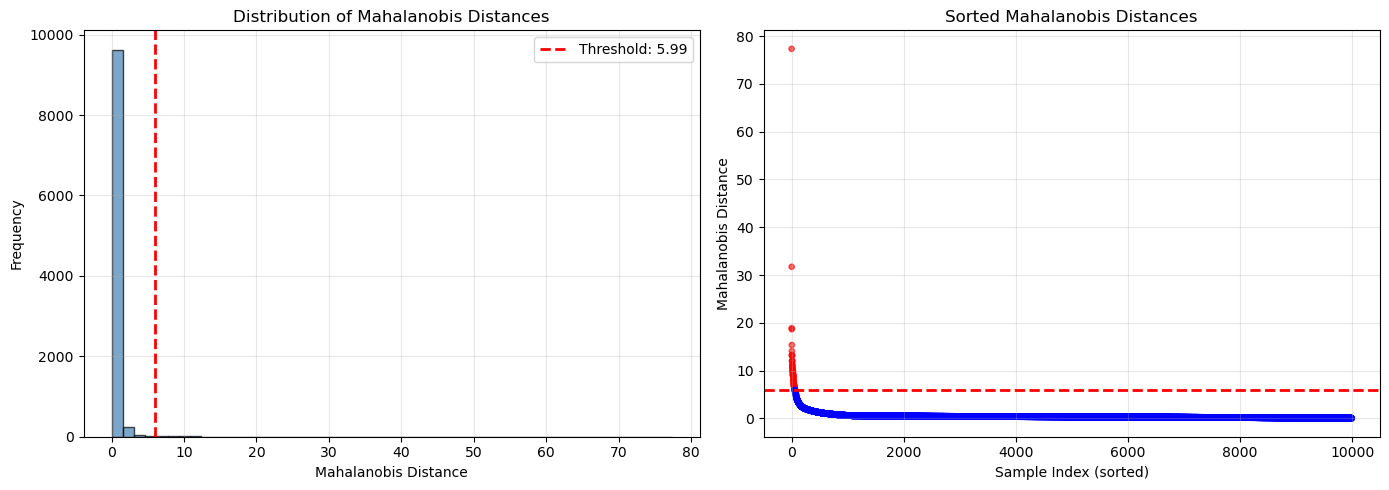

In [748]:
# Plot Mahalanobis Distance distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sorted_indices = np.argsort(md_scores_all)[::-1]
sorted_scores = md_scores_all[sorted_indices]

axes[0].hist(md_scores_all, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(chi2_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {chi2_threshold:.2f}')
axes[0].set_xlabel('Mahalanobis Distance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Mahalanobis Distances')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

colors = ['red' if score > chi2_threshold else 'blue' for score in sorted_scores]
axes[1].scatter(range(len(sorted_scores)), sorted_scores, c=colors, alpha=0.6, s=15)
axes[1].axhline(chi2_threshold, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Sample Index (sorted)')
axes[1].set_ylabel('Mahalanobis Distance')
axes[1].set_title('Sorted Mahalanobis Distances')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [749]:
# Map MD (Mahalanobis Distance) outliers with df_prepared_data
md_outlier_list = list(md_outlier_indices)
md_outliers_mapped = []

for idx in md_outlier_list:
    row = df_prepared_data.iloc[idx].to_dict()
    row['Index'] = idx
    row['MD_Score'] = md_scores_all[idx]
    md_outliers_mapped.append(row)

md_outliers_df = pd.DataFrame(md_outliers_mapped).sort_values('MD_Score', ascending=False).reset_index(drop=True)

md_outliers_df.head(10)

,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier,Index,MD_Score
0,2,58 - ROUTINE INVESTIGATION,BMV,"Highway, Street, Alley ETC",554,NORTHWEST,550,D13,Tue,Individual,Hispanic or Latino,Hispanic or Latino,Male,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.477929e+06,7.008419e+06,0.652222,138.450000,1,False,91,77.358597
1,3,6X - MAJOR DIST (VIOLENCE),ASSAULT -BODILY INJURY ONLY,Apartment Residence,346,SOUTHEAST,340,D7,Fri,Individual,Black,Non-Hispanic or Latino,Female,ASSAULT OFFENSES,PERSON,A,2.504986e+06,6.967050e+06,4.912778,0.166667,2,False,5279,31.717862
2,3,**PD REQUESTED BY FIRE,UNEXPLAINED DEATH (NO OFFENSE),Apartment Residence,325,SOUTHEAST,320,D7,Thu,Individual,Black,Non-Hispanic or Latino,Female,MISCELLANEOUS,MISCELLANEOUS,C,2.534393e+06,6.961375e+06,7.345833,1.316667,4,False,2761,18.870238
3,2,PSE/09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Outdoor Area Public/Private,134,CENTRAL,130,D14,Tue,Individual,White,Non-Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.492521e+06,6.971124e+06,1.939444,30.283333,2,False,4363,18.644005
4,1,PSE/11V - BURG MOTOR VEH,UNAUTHORIZED USE OF MOTOR VEH - (ATT) AUTOMOBILE,Apartment Parking Lot,245,NORTHEAST,240,D10,Thu,Individual,Black,Non-Hispanic or Latino,Female,MOTOR VEHICLE THEFT,PROPERTY,A,2.511169e+06,7.008374e+06,24.152222,46.533333,5,True,3105,15.344125
5,3,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS,Apartment Parking Lot,545,NORTHWEST,540,D14,Tue,Individual,White,Non-Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.485928e+06,6.981104e+06,4.000278,44.583333,2,False,6960,14.054995
6,2,58 - ROUTINE INVESTIGATION,LOST PROPERTY (NO OFFENSE),Single Family Residence - Occupied,434,SOUTHWEST,430,D1,Fri,Individual,Hispanic or Latino,Hispanic or Latino,Male,MISCELLANEOUS,MISCELLANEOUS,C,2.459799e+06,6.947485e+06,0.575278,338.100000,3,False,2346,13.218539
7,3,DAEF-DIST ARMED ENCOUNTER FOOT,DEADLY CONDUCT DISCHARGE FIREARM (DAMAGE),Apartment Complex/Building,445,SOUTHWEST,440,D3,Wed,Individual,Black,Non-Hispanic or Latino,Male,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,A,2.472669e+06,6.946727e+06,3.148333,0.283333,3,False,7322,13.188901
8,1,PSE/11V - BURG MOTOR VEH,BMV,Outdoor Area Public/Private,635,NORTH CENTRAL,630,D11,Sun,Individual,White,Non-Hispanic or Latino,Male,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.494553e+06,7.028401e+06,2.102500,10.733333,0,False,380,13.061767
9,1,19 - SHOOTING,ASSAULT (AGG) - PRELIMINARY INVESTIGATION *NON FAMILY VIOLENCE,Other,217,NORTHEAST,210,D13,Wed,Individual,Hispanic or Latino,Hispanic or Latino,Male,MISCELLANEOUS,MISCELLANEOUS,C,2.504097e+06,7.005453e+06,5.993611,3.350000,5,False,77,12.027656


### **7.8 Combine Results from All 4 Models to find Common Outliers**

In [750]:
# Combine results from all four methods

# Find intersection of all 4 methods
common_outliers_indices = lof_outlier_indices & isf_outlier_indices & ocsvm_outlier_indices & md_outlier_indices

# Map common outliers with all anomaly scores
common_outliers_list = []
for idx in common_outliers_indices:
    row = df_prepared_data.iloc[idx].to_dict()
    row['Index'] = idx
    row['LOF_Score'] = lof_scores_all[idx]
    row['ISF_Score'] = isf_scores_all[idx]
    row['OCSVM_Score'] = ocsvm_scores_all[idx]
    row['MD_Score'] = md_scores_all[idx]
    common_outliers_list.append(row)

common_outliers_df = pd.DataFrame(common_outliers_list).sort_values('LOF_Score', ascending=False).reset_index(drop=True)

print(f"\n{'='*80}")
print(f"COMMON OUTLIERS DETECTED BY ALL 4 METHODS")
print(f"{'='*80}")
print(f"\nTotal Common Outliers: {len(common_outliers_df)}")
print(f"\nCommon Outliers DataFrame:")
common_outliers_df.head(10)


COMMON OUTLIERS DETECTED BY ALL 4 METHODS

Total Common Outliers: 9

Common Outliers DataFrame:


,Watch,Call (911) Problem,Type of Incident,Type Location,Beat,Division,Sector,Council District,Day1 of the Week,Victim Type,Victim Race,Victim Ethnicity,Victim Gender,NIBRS Crime Category,NIBRS Crime Against,NIBRS Group,X Coordinate,Y Coordinate,Response Time (Hours),Time Taken to Report (Hours),Zone,Is_Outlier,Index,LOF_Score,ISF_Score,OCSVM_Score,MD_Score
0,1,40/01 - OTHER,"CRIM MISCHIEF > OR EQUAL $2,500 < $30K",Single Family Residence - Vacant,143,CENTRAL,140,D2,Sat,Individual,White,Non-Hispanic or Latino,Male,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,A,2.494864e+06,6.982178e+06,3.305833,38.833333,2,False,93,1.360761,0.373762,0.279574,6.411744
1,2,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Apartment Complex/Building,444,SOUTHWEST,440,D1,Thu,Individual,Hispanic or Latino,Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.474780e+06,6.956141e+06,0.858889,3.516667,3,False,38,1.263032,0.378103,0.059001,8.994125
2,1,19 - SHOOTING,ASSAULT (AGG) - PRELIMINARY INVESTIGATION *NON FAMILY VIOLENCE,Other,217,NORTHEAST,210,D13,Wed,Individual,Hispanic or Latino,Hispanic or Latino,Male,MISCELLANEOUS,MISCELLANEOUS,C,2.504097e+06,7.005453e+06,5.993611,3.350000,5,False,77,1.251373,0.379520,0.103168,12.027656
3,2,58 - ROUTINE INVESTIGATION,BMV,"Highway, Street, Alley ETC",554,NORTHWEST,550,D13,Tue,Individual,Hispanic or Latino,Hispanic or Latino,Male,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.477929e+06,7.008419e+06,0.652222,138.450000,1,False,91,1.240439,0.375001,0.007542,77.358597
4,1,7X - MAJOR ACCIDENT,COLLISION INV DAMAGE TO VEHICLE > OR EQUAL $200,"Highway, Street, Alley ETC",135,CENTRAL,130,D2,Sat,Individual,Black,Non-Hispanic or Latino,Female,MISCELLANEOUS,MISCELLANEOUS,C,2.493931e+06,6.970463e+06,2.203333,1.250000,2,False,280,1.213769,0.379453,0.026018,6.966464
5,1,PSE/11V - BURG MOTOR VEH,BMV,Apartment Parking Lot,154,CENTRAL,150,D14,Wed,Individual,Black,Non-Hispanic or Latino,Male,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.495071e+06,6.977173e+06,2.040833,17.216667,2,False,149,1.200232,0.373574,0.141641,8.250756
6,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Parking Lot (All Others),134,CENTRAL,130,D14,Sat,Individual,White,Non-Hispanic or Latino,Male,MOTOR VEHICLE THEFT,PROPERTY,A,2.491973e+06,6.971024e+06,2.041667,12.183333,2,False,402,-1.228779,0.373860,0.120552,6.428932
7,1,20 - ROBBERY,ROBBERY OF BUSINESS (AGG),Convenience Store,523,NORTHWEST,520,D2,Fri,Individual,Asian,Non-Hispanic or Latino,Male,ROBBERY,PROPERTY,A,2.481242e+06,6.991552e+06,3.093889,0.100000,1,False,358,-1.293139,0.378368,0.000553,7.191902
8,1,PSE/11V - BURG MOTOR VEH,BMV,Outdoor Area Public/Private,635,NORTH CENTRAL,630,D11,Sun,Individual,White,Non-Hispanic or Latino,Male,LARCENY/ THEFT OFFENSES,PROPERTY,A,2.494553e+06,7.028401e+06,2.102500,10.733333,0,False,380,-1.319178,0.376471,0.072629,13.061767


### **7.9 Comprehensive Visualization of All 4 Outlier Detection Methods**

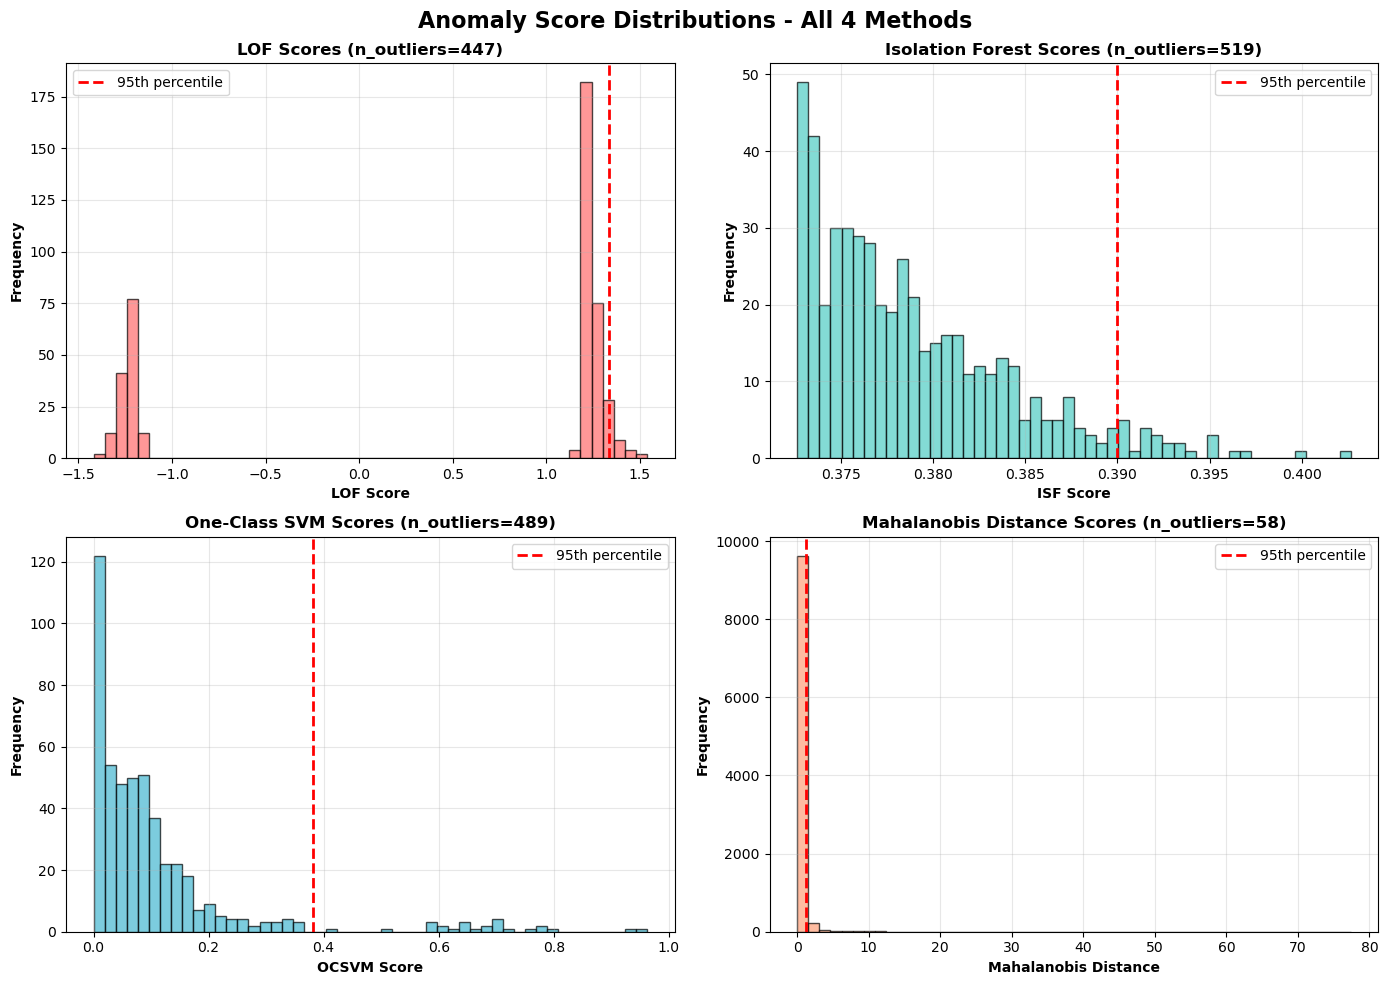

✓ Anomaly score distributions displayed for all 4 methods


In [751]:
# Create comprehensive visualizations for all 4 outlier detection methods

# 1. SUBPLOT: Anomaly Score Distributions for All 4 Methods
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Anomaly Score Distributions - All 4 Methods', fontsize=16, fontweight='bold')

# LOF Scores
axes[0, 0].hist(lof_scores_all, bins=50, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(np.percentile(lof_scores_all, 95), color='red', linestyle='--', linewidth=2, label='95th percentile')
axes[0, 0].set_xlabel('LOF Score', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title(f'LOF Scores (n_outliers={len(lof_outlier_indices)})', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# ISF Scores
axes[0, 1].hist(isf_scores_all, bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(np.percentile(isf_scores_all, 95), color='red', linestyle='--', linewidth=2, label='95th percentile')
axes[0, 1].set_xlabel('ISF Score', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title(f'Isolation Forest Scores (n_outliers={len(isf_outlier_indices)})', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# OCSVM Scores
axes[1, 0].hist(ocsvm_scores_all, bins=50, color='#45B7D1', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(np.percentile(ocsvm_scores_all, 95), color='red', linestyle='--', linewidth=2, label='95th percentile')
axes[1, 0].set_xlabel('OCSVM Score', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title(f'One-Class SVM Scores (n_outliers={len(ocsvm_outlier_indices)})', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# MD Scores
axes[1, 1].hist(md_scores_all, bins=50, color='#FFA07A', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(np.percentile(md_scores_all, 95), color='red', linestyle='--', linewidth=2, label='95th percentile')
axes[1, 1].set_xlabel('Mahalanobis Distance', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title(f'Mahalanobis Distance Scores (n_outliers={len(md_outlier_indices)})', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Anomaly score distributions displayed for all 4 methods")


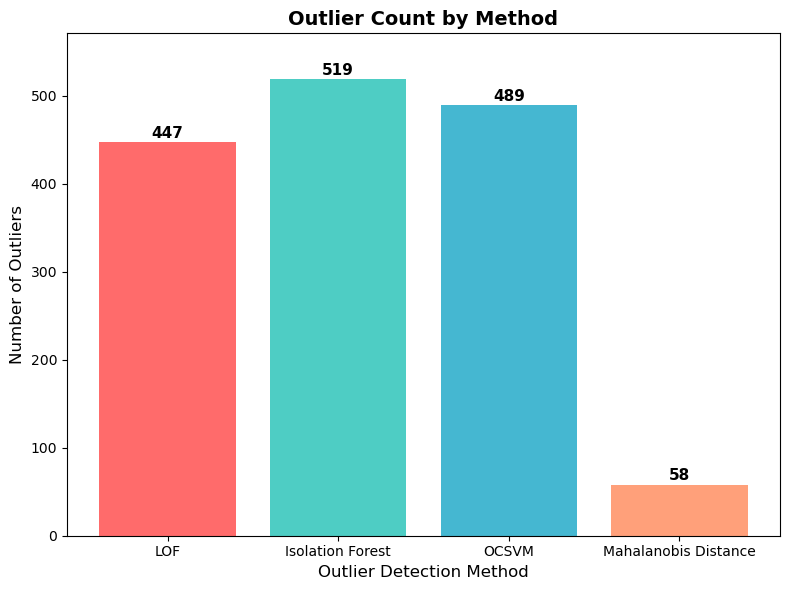

In [752]:
import matplotlib.pyplot as plt

methods = ['LOF', 'Isolation Forest', 'OCSVM', 'Mahalanobis Distance']
counts = [len(lof_outlier_indices), len(isf_outlier_indices), len(ocsvm_outlier_indices), len(md_outlier_indices)]

plt.figure(figsize=(8, 6))
plt.bar(methods, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.xlabel('Outlier Detection Method', fontsize=12)
plt.ylabel('Number of Outliers', fontsize=12)
plt.title('Outlier Count by Method', fontsize=14, fontweight='bold')
plt.ylim(0, max(counts) * 1.1)

for i, (method, count) in enumerate(zip(methods, counts)):
    plt.text(i, count + 5, str(count), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [753]:
common_outliers_df.to_csv('Common Outliers.csv')

## **Model Performance Interpretation and Comparative Analysis**

The four outlier detection methods demonstrate complementary yet distinct detection strategies, revealing a nuanced picture of anomalies in the crime dataset. **Local Outlier Factor (LOF)** and **Isolation Forest (ISF)** emerge as the most sensitive detectors, identifying 447 and 519 outliers respectively through density-based and recursive partitioning approaches, while **One-Class SVM (OCSVM)** identifies 489 outliers by learning decision boundaries in the feature space. In stark contrast, **Mahalanobis Distance (MD)** is far more conservative, flagging only 58 outliers using strict multivariate statistical criteria. The strong consensus among LOF, ISF, and OCSVM—which share 438 records in their detection, suggests high reliability for these 438 instances, indicating they represent genuine anomalies that deviate substantially from normal crime patterns. The divergence with MD, which only overlaps with 9 records detected by all methods, underscores that MD captures statistical extremes on a different principle: multivariate distance from the feature centroid rather than local density or boundary isolation. Only 9 records achieve unanimous detection across all four methods, representing truly pathological cases where records are anomalous regardless of the detection paradigm employed. This ensemble perspective indicates that **crime records flagged by any three methods (438 records) warrant high confidence for investigation**, while the 9 universally flagged records should be treated as critical anomalies requiring immediate attention, as they violate normal crime patterns across every analytical dimension simultaneously.